
# 대회 목적
## 빅데이터를 통해 코로나 시대 의미 있는 인사이트 도출

코로나 시대와 의미있는 인사이트
배달 관련 아이디어?
- 코로나 전과 비교해 코로나 후, 배달 사업이 잘된다?
- 코로나 전과 비교해 얼마나 많은 점포가 창업을 했나?
- 코로나 전과 비교해 얼마나 폐업을 했는지?
- 코로나로 인해 새로 사업을 시작하는 사람이 많을까?

- 코로나 전과 비교해서 창업과 폐업의 비율 확인
- 배달 콜수의 증가량
- 성별에 따른 주문량 혹은 주문 증가량
- 내국인과 외국인의 주문량 및 상대적인 비교를 위해, 주문시 평균 금액 등
- 외국인중에서는 단기와 장기 외국인 어떤 그룹에서 더 많이 시켰는지

### 배달 소요 시간별 장사가 잘되나?
- 배달 소요시간에 따른 총 매출액의 차이가 날 것이다.
> 배달을 시키고 오래 기다리는 경우, 재주문율이 낮아지지 않을까?


## 빅데이터 분석 생태계 활성화 및 아이디어 발굴





# 데이터 확인


## dlvr_call.csv

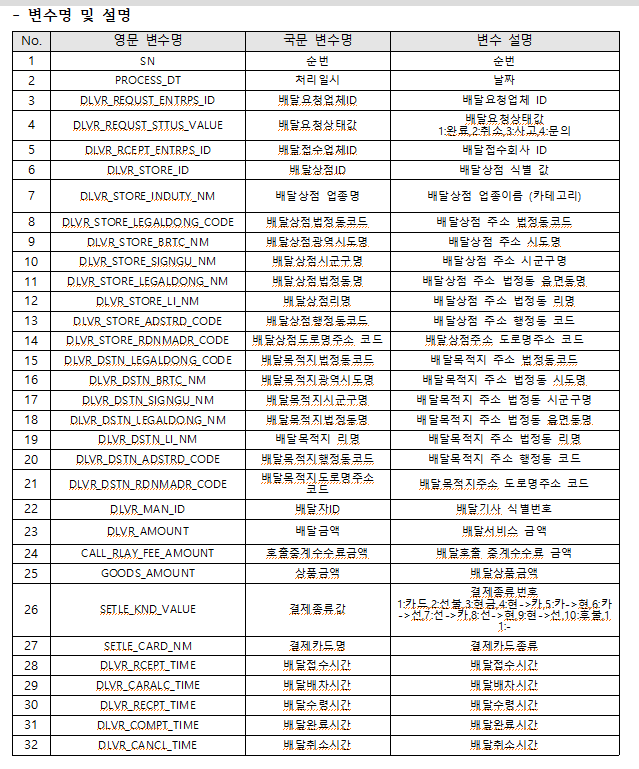

## 2. popl.csv
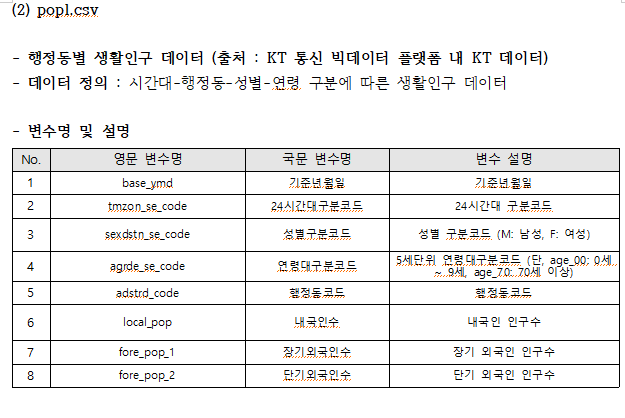

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 경고창 무시
import warnings
warnings.filterwarnings(action='ignore')

# matplotlib 한글 폰트 오류 해결
import platform
from matplotlib import rc
import matplotlib.font_manager as fm
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

import platform

if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        !wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        !mv malgun.ttf /usr/share/fonts/truetype/
        import matplotlib.font_manager as fm 
        fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

--2021-08-26 06:23:46--  https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9595100 (9.2M) [application/octetstream]
Saving to: ‘malgun.ttf’

malgun.ttf          100%[===================>]   9.15M  24.2MB/s    in 0.4s    

2021-08-26 06:23:46 (24.2 MB/s) - ‘malgun.ttf’ saved [9595100/9595100]



In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/data/KT_Bigdata'
'/content/drive/MyDrive/Colab Notebooks/data/KT_Bigdata/dlvr_call (1).csv'

# start_region = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/KT_Bigdata/StartupOrClosing_Region.csv', encoding='cp949')
# start_shop=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/KT_Bigdata/StartupOrClosing_Shop.csv', encoding='cp949')
dlvr_call =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/KT_Bigdata/dlvr_call (1).csv')
popl_call =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/KT_Bigdata/popl.csv')

이외 추가자료. 
COVID_19 (625KB) -> 작년과 동일한 코로나 확진자 데이터 정보
- 코로나 확진자 데이터 (출처: DS4C https://github.com/jihoo-kim/Data-Science-for-COVID-19)


COVID_eng_kor_table.xlsx (20KB) -> 작년과 동일한 코로나 확진자 데이터 정보
- 코로나 데이터 province, city 컬럼 영/한 변환 테이블 (Google Translate API 사용)

코로나 감염자 사례, 감염자 정보, 정부정책(코로나방역지침), 지역별정보, e등등 시간별확진자 현황외의 정보

In [ ]:
dlvr_call.head(1)

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,3486929,2019-12-01,C000101,1,C000101,S0021950,족발/보쌈,1156013200,서울특별시,영등포구,신길동,\N,1156066000,115603000023,1159010800,서울특별시,동작구,대방동,\N,1159066000,115904157098,D0006140,3300,200,18000,1,승인:KB국민카드,2019-12-01 20:47:52,2019-12-01 20:48:11,2019-12-01 20:55:33,2019-12-01 21:00:15,\N


In [ ]:
dlvr_call.isnull().sum()
# np.where(dlvr_call.isnull())
# dlvr_call.iloc[2]
# dlvr_call.GOODS_AMOUNT.isnull()
# dlvr_call.iloc[258893]
# dlvr_call.dropna(inplace=True, axis=0, how='any')
dlvr_call['DLVR_AMOUNT'].dropna(inplace=True, axis=0, how='any')

In [ ]:
dlvr_call.drop(index=258893, inplace=True)
dlvr_call.isnull().sum()

SN                                 0
PROCESS_DT                         0
DLVR_REQUST_ENTRPS_ID              0
DLVR_REQUST_STTUS_VALUE            0
DLVR_RCEPT_ENTRPS_ID               0
DLVR_STORE_ID                      0
DLVR_STORE_INDUTY_NM               0
DLVR_STORE_LEGALDONG_CODE          0
DLVR_STORE_BRTC_NM                 0
DLVR_STORE_SIGNGU_NM               0
DLVR_STORE_LEGALDONG_NM            0
DLVR_STORE_LI_NM                   0
DLVR_STORE_ADSTRD_CODE             0
DLVR_STORE_RDNMADR_CODE            0
DLVR_DSTN_LEGALDONG_CODE           0
DLVR_DSTN_BRTC_NM                  0
DLVR_DSTN_SIGNGU_NM                0
DLVR_DSTN_LEGALDONG_NM             0
DLVR_DSTN_LI_NM                    0
DLVR_DSTN_ADSTRD_CODE              0
DLVR_DSTN_RDNMADR_CODE             0
DLVR_MAN_ID                        0
DLVR_AMOUNT                        0
CALL_RLAY_FEE_AMOUNT               0
GOODS_AMOUNT                       0
SETLE_KND_VALUE                    0
SETLE_CARD_NM                3177884
D

In [ ]:
popl_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2245588 entries, 0 to 2245587
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   base_ymd         int64  
 1   tmzon_se_code    int64  
 2   sexdstn_se_code  object 
 3   agrde_se_code    object 
 4   adstrd_code      float64
 5   local_pop        float64
 6   fore_pop_1       float64
 7   fore_pop_2       float64
dtypes: float64(4), int64(2), object(2)
memory usage: 137.1+ MB


In [ ]:
popl_call.isnull().sum()
popl_call[popl_call['local_pop'].isnull()]
popl_call.drop(index=2245587, inplace=True)
popl_call.isnull().sum()

base_ymd           0
tmzon_se_code      0
sexdstn_se_code    0
agrde_se_code      0
adstrd_code        0
local_pop          0
fore_pop_1         0
fore_pop_2         0
dtype: int64

In [ ]:
dlvr_call.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4296270 entries, 0 to 4296270
Data columns (total 32 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   SN                         int64 
 1   PROCESS_DT                 object
 2   DLVR_REQUST_ENTRPS_ID      object
 3   DLVR_REQUST_STTUS_VALUE    int64 
 4   DLVR_RCEPT_ENTRPS_ID       object
 5   DLVR_STORE_ID              object
 6   DLVR_STORE_INDUTY_NM       object
 7   DLVR_STORE_LEGALDONG_CODE  int64 
 8   DLVR_STORE_BRTC_NM         object
 9   DLVR_STORE_SIGNGU_NM       object
 10  DLVR_STORE_LEGALDONG_NM    object
 11  DLVR_STORE_LI_NM           object
 12  DLVR_STORE_ADSTRD_CODE     int64 
 13  DLVR_STORE_RDNMADR_CODE    object
 14  DLVR_DSTN_LEGALDONG_CODE   int64 
 15  DLVR_DSTN_BRTC_NM          object
 16  DLVR_DSTN_SIGNGU_NM        object
 17  DLVR_DSTN_LEGALDONG_NM     object
 18  DLVR_DSTN_LI_NM            object
 19  DLVR_DSTN_ADSTRD_CODE      object
 20  DLVR_DSTN_RDNMADR_CODE  

In [ ]:
dlvr_call['PROCESS_DT'] = pd.to_datetime(dlvr_call['PROCESS_DT'])

In [ ]:
dlvr_call['PROCESS_DT']

0         2019-12-01
1         2019-12-01
2         2019-12-01
3         2019-12-01
4         2019-12-01
             ...    
4296266   2020-03-31
4296267   2020-03-31
4296268   2020-03-31
4296269   2020-03-31
4296270   2020-03-31
Name: PROCESS_DT, Length: 4296270, dtype: datetime64[ns]

In [ ]:
np.where(dlvr_call['DLVR_COMPT_TIME'] == '\\N')
dlvr_call[dlvr_call['DLVR_COMPT_TIME'] == '\\N']
dlvr_call['is_canceled'] = dlvr_call['DLVR_COMPT_TIME'].apply(lambda x: 1 if x=='\\N' else 0)
canc_call = dlvr_call[dlvr_call['is_canceled']==1]
comp_call = dlvr_call[dlvr_call['is_canceled']==0]
comp_call

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,is_canceled
0,3486929,2019-12-01,C000101,1,C000101,S0021950,족발/보쌈,1156013200,서울특별시,영등포구,신길동,\N,1156066000,115603000023,1159010800,서울특별시,동작구,대방동,\N,1159066000,115904157098,D0006140,3300,200,18000,1,승인:KB국민카드,2019-12-01 20:47:52,2019-12-01 20:48:11,2019-12-01 20:55:33,2019-12-01 21:00:15,\N,0
1,3486930,2019-12-01,C000099,1,C000099,S0039210,치킨,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412854379205,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412853193037,D0005898,2900,0,21900,1,승인:현대카드사,2019-12-01 21:58:07,2019-12-01 22:01:06,2019-12-01 22:20:53,2019-12-01 22:26:01,\N,0
2,3486932,2019-12-01,C000029,1,C000043,S0036135,치킨,4115010100,경기도,의정부시,의정부동,\N,4115051000,411504343421,4115011100,경기도,의정부시,녹양동,\N,4115062000,411504343083,D0000864,3500,200,19500,2,NaN,2019-12-01 22:20:31,2019-12-01 22:37:45,2019-12-01 22:58:27,2019-12-01 22:58:32,\N,0
3,3486933,2019-12-01,C000105,1,C000105,S0039956,돈까스/일식,4128510400,경기도,고양시 일산동구,장항동,\N,4128559000,412854379097,4128510500,경기도,고양시 일산동구,마두동,\N,4128556000,412854379158,D0001526,3500,0,18000,2,NaN,2019-12-01 21:40:39,2019-12-01 21:48:41,2019-12-01 22:06:35,2019-12-01 22:17:57,\N,0
4,3486934,2019-12-01,C000028,1,C000043,S0003074,치킨,4115010900,경기도,의정부시,금오동,\N,4115058000,411504343342,4115010900,경기도,의정부시,금오동,\N,4115058000,411503181019,D0000986,3500,200,18000,3,NaN,2019-12-01 19:44:37,2019-12-01 19:48:07,2019-12-01 19:54:30,2019-12-01 20:00:22,\N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4296266,7750546,2020-03-31,C000237,1,C000237,S0021188,족발/보쌈,4121010200,경기도,광명시,철산동,\N,4121060000,4.12103E+11,4121010200,경기도,광명시,철산동,\N,4121059000,4.12103E+11,D0009705,3300,300,20900,2,NaN,2020-03-31 23:56,2020-03-31 23:56,2020-04-01 0:14,2020-04-01 0:18,\N,0
4296267,7750548,2020-03-31,C000104,1,C000102,S0021967,치킨,1156013300,서울특별시,영등포구,대림동,\N,1156070000,1.15603E+11,1162010200,서울특별시,관악구,신림동,\N,1162065500,1.16204E+11,D0002307,6300,200,26000,1,승인:신한카드,2020-03-31 23:55,2020-03-31 23:55,2020-04-01 0:17,2020-04-01 0:26,\N,0
4296268,7750550,2020-03-31,C000224,1,C000224,S0035329,분식,4127110400,경기도,안산시 상록구,본오동,\N,4127156000,4.12713E+11,4127310100,경기도,안산시 단원구,고잔동,\N,4127353500,4.12734E+11,D0009816,5500,200,17000,1,승인:롯데카드사,2020-03-31 23:58,2020-03-31 23:59,2020-04-01 0:18,2020-04-01 0:30,\N,0
4296269,7750552,2020-03-31,C000130,1,C000130,S0002286,족발/보쌈,4128112300,경기도,고양시 덕양구,화정동,\N,4128162200,4.12813E+11,4128112800,경기도,고양시 덕양구,행신동,\N,4128165500,4.12814E+11,D0002233,4000,300,35000,2,NaN,2020-03-31 23:56,2020-04-01 0:01,2020-04-01 0:16,2020-04-01 0:23,\N,0


In [ ]:
canc_call

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,is_canceled
41,3486993,2019-12-01,C000082,2,\N,S0041000,피자,4128510500,경기도,고양시 일산동구,마두동,\N,4128556000,412853193028,4128510100,경기도,고양시 일산동구,식사동,\N,4128551000,412853193027,\N,4300,0,27700,3,NaN,2019-12-01 19:45:16,\N,\N,\N,2019-12-01 19:54:42,1
69,3487034,2019-12-01,C000077,2,\N,S0021900,피자,4119011500,경기도,부천시,옥길동,\N,4119079500,411903185011,4139010600,경기도,시흥시,은행동,\N,4139054000,413903351808,\N,5300,0,13000,3,NaN,2019-12-01 19:24:28,\N,\N,\N,2019-12-01 19:35:57,1
72,3487037,2019-12-01,C000049,2,\N,S0000121,피자,1153010700,서울특별시,구로구,개봉동,\N,1153074000,115303000028,1153010700,서울특별시,구로구,개봉동,\N,1153076000,115304148047,\N,3800,0,26530,1,NaN,2019-12-01 19:02:36,\N,\N,\N,2019-12-01 19:22:31,1
126,3487124,2019-12-01,C000254,2,\N,S0020970,아시안/양식,4119010800,경기도,부천시,중동,\N,4119061000,411904352279,4119010800,경기도,부천시,중동,\N,4119061000,411903000066,\N,3500,0,22000,2,NaN,2019-12-01 20:00:34,\N,\N,\N,2019-12-01 20:02:28,1
214,3487273,2019-12-01,C000082,2,\N,S0028426,치킨,4128510600,경기도,고양시 일산동구,백석동,\N,4128555100,412853193003,4128510500,경기도,고양시 일산동구,마두동,\N,4128556000,412853193028,\N,3500,0,0,2,NaN,2019-12-01 18:44:34,\N,\N,\N,2019-12-01 19:04:10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4296090,7750273,2020-03-31,C000029,2,\N,S0036079,돈까스/일식,4115010100,경기도,의정부시,의정부동,\N,4115051000,4.11504E+11,4115010100,경기도,의정부시,의정부동,\N,4115051000,4.11504E+11,\N,3500,0,15500,3,NaN,2020-03-31 22:42,\N,\N,\N,2020-03-31 22:59,1
4296098,7750288,2020-03-31,C000141,2,C000141,S0020497,치킨,4139010600,경기도,시흥시,은행동,\N,4139054000,4.13903E+11,4139010200,경기도,시흥시,신천동,\N,4139052000,4.13902E+11,D0010371,3000,300,15900,1,NaN,2020-03-31 22:21,2020-03-31 22:22,\N,\N,2020-03-31 22:26,1
4296164,7750391,2020-03-31,C000036,2,\N,S0036760,야식,4115010100,경기도,의정부시,의정부동,\N,4115052000,4.11504E+11,4115010100,경기도,의정부시,의정부동,\N,4115052000,4.11504E+11,\N,0,0,0,1,NaN,2020-03-31 23:11,\N,\N,\N,2020-04-01 8:00,1
4296237,7750504,2020-03-31,C000254,2,\N,S0020749,치킨,4119010100,경기도,부천시,원미동,\N,4119060300,4.11903E+11,4119011100,경기도,부천시,심곡본동,\N,4119074600,4.11904E+11,\N,4000,0,16000,3,NaN,2020-03-31 23:41,\N,\N,\N,2020-03-31 23:51,1


In [ ]:
np.where(dlvr_call['DLVR_RECPT_TIME'] == '\\N')
dlvr_call[dlvr_call['DLVR_RECPT_TIME'] == '\\N']
dlvr_call.query(r'DLVR_RECPT_TIME=="\\N" and DLVR_COMPT_TIME !="\\N"')
### 배달접수, 배차, 수령, 완료 시간.
### 접수랑 완료가 있고, 배차 수령이 없는 경우
### 접수, 배차 완료가 있고, 수령이 없는 경우
### 완료가 없는 경우는 취소,
### 배달이 완료 된 후, 취소 된 경우? => 
dlvr_call.query(r'DLVR_CANCL_TIME!="\\N" and DLVR_COMPT_TIME !="\\N"')
bad_c = dlvr_call.query(r'DLVR_RECPT_TIME=="\\N" and DLVR_COMPT_TIME !="\\N"')['DLVR_RCEPT_ENTRPS_ID'].unique().tolist()
bad_c

['C000130',
 'C000411',
 'C000238',
 'C000096',
 'C000049',
 'C000407',
 'C000237',
 'C000176',
 'C000026',
 'C000133',
 'C000382',
 'C000365',
 'C000253',
 'C000367',
 '\\N',
 'C000284',
 'C000222',
 'C000122',
 'C000109',
 'C000129',
 'C000285',
 'C000043',
 'C000117',
 'C000402',
 'C000373',
 'C000101',
 'C000254',
 'C000250',
 'C000124',
 'C000301',
 'C000105',
 'C000173',
 'C000224',
 'C000240',
 'C000249',
 'C000265',
 'C000421',
 'C000456',
 'C000098',
 'C000345',
 'C000295',
 'C000150',
 'C000394',
 'C000260',
 'C000383',
 'C000210',
 'C000099',
 'C000303',
 'C000023',
 'C000077',
 'C000307',
 'C000141',
 'C000369',
 'C000305',
 'C000082',
 'C000256',
 'C000439',
 'C000298',
 'C000157',
 'C000262',
 'C000266',
 'C000309',
 'C000363',
 'C000071',
 'C000104',
 'C000167',
 'C000312',
 'C000316',
 'C000094',
 'C000209',
 'C000263',
 'C000102',
 'C000332',
 'C000467',
 'C000449',
 'C000325',
 'C000103',
 'C000330',
 'C000375',
 'C000477',
 'C000478',
 'C000455',
 'C000342',
 'C00034

In [ ]:
## 취소 시간과 완료시간을 모두 가지면 안되니 확인
dlvr_call.query(r'DLVR_COMPT_TIME=="\\N" and DLVR_CANCL_TIME=="\\N"')

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,is_canceled


In [ ]:
dlvr_call[dlvr_call['DLVR_RCEPT_ENTRPS_ID'].isin(bad_c)]
### 나쁜 업체들 중에서 수령시간이 비어있는 데이터 확인용
dlvr_call[dlvr_call['DLVR_RCEPT_ENTRPS_ID'].isin(bad_c)].query(r'DLVR_RECPT_TIME == "\\N" and DLVR_COMPT_TIME!="\\N"')
# dlvr_call.query(r'DLVR_RECPT_TIME == "\\N" and DLVR_COMPT_TIME!="\\N"')
#전체 데이터와 나쁜 업체의 데이터를 비교시, 둘다 337행으로 동일
## 나쁜짓을 하는 업체만 나쁜짓(수령시간을 적지 않고 배달 완료시간을 적음, 혹은 배차 시간을 적지 않음)
dlvr_call.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4296270 entries, 0 to 4296270
Data columns (total 33 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   SN                         int64         
 1   PROCESS_DT                 datetime64[ns]
 2   DLVR_REQUST_ENTRPS_ID      object        
 3   DLVR_REQUST_STTUS_VALUE    int64         
 4   DLVR_RCEPT_ENTRPS_ID       object        
 5   DLVR_STORE_ID              object        
 6   DLVR_STORE_INDUTY_NM       object        
 7   DLVR_STORE_LEGALDONG_CODE  int64         
 8   DLVR_STORE_BRTC_NM         object        
 9   DLVR_STORE_SIGNGU_NM       object        
 10  DLVR_STORE_LEGALDONG_NM    object        
 11  DLVR_STORE_LI_NM           object        
 12  DLVR_STORE_ADSTRD_CODE     int64         
 13  DLVR_STORE_RDNMADR_CODE    object        
 14  DLVR_DSTN_LEGALDONG_CODE   int64         
 15  DLVR_DSTN_BRTC_NM          object        
 16  DLVR_DSTN_SIGNGU_NM        object   

## 데이터 전처리 및 타입 변환


In [ ]:
## 변환
# DLVR_RCEPT_TIME	DLVR_CARALC_TIME	DLVR_RECPT_TIME	DLVR_COMPT_TIME
comp_call = comp_call[~comp_call['DLVR_RCEPT_ENTRPS_ID'].isin(bad_c)]
comp_call['DLVR_RCEPT_TIME'] = pd.to_datetime(comp_call['DLVR_RCEPT_TIME'], format='%Y-%m-%d %H:%M:%S')
comp_call['DLVR_CARALC_TIME'] = pd.to_datetime(comp_call['DLVR_CARALC_TIME'], format='%Y-%m-%d %H:%M:%S')
comp_call['DLVR_RECPT_TIME'] = pd.to_datetime(comp_call['DLVR_RECPT_TIME'], format='%Y-%m-%d %H:%M:%S')
comp_call['DLVR_COMPT_TIME'] = pd.to_datetime(comp_call['DLVR_COMPT_TIME'], format='%Y-%m-%d %H:%M:%S')


### 월, 주, 요일 만들기

In [ ]:
comp_call['hour'] = comp_call['DLVR_RCEPT_TIME'].dt.hour
comp_call['day'] = comp_call['PROCESS_DT'].dt.dayofweek
comp_call['year'] = comp_call['PROCESS_DT'].dt.year

### 추가// 2019년과 2020년 data frame 나눈 후, week 와 month 구분을 위함



In [ ]:
comp19 = comp_call[comp_call['year']==2019]
comp20 = comp_call[comp_call['year']==2020]
comp20

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,is_canceled,hour,day,year
641656,4578052,2020-01-01,C000300,1,C000300,S0003055,치킨,1130510100,서울특별시,강북구,미아동,\N,1130553400,113053005042,1130510100,서울특별시,강북구,미아동,\N,1130555500,113054124369,D0006753,3500,300,0,2,NaN,2020-01-01 00:01:10,2020-01-01 00:06:00,2020-01-01 00:29:24,2020-01-01 00:45:05,\N,0,0,2,2020
641769,4578206,2020-01-01,C000300,1,C000300,S0003055,치킨,1130510100,서울특별시,강북구,미아동,\N,1130553400,113053005042,1130510300,서울특별시,강북구,수유동,\N,1130563500,113054124141,D0006721,4800,300,0,2,NaN,2020-01-01 00:01:34,2020-01-01 00:04:19,2020-01-01 00:21:39,2020-01-01 00:39:51,\N,0,0,2,2020
641810,4578258,2020-01-01,C000300,1,C000300,S0003055,치킨,1130510100,서울특별시,강북구,미아동,\N,1130553400,113053005042,1130510100,서울특별시,강북구,미아동,\N,1130555500,113054124394,D0006753,3800,300,0,2,NaN,2020-01-01 00:10:25,2020-01-01 00:22:57,2020-01-01 00:24:51,2020-01-01 00:49:51,\N,0,0,2,2020
641884,4578357,2020-01-01,C000300,1,C000300,S0035442,치킨,1130510100,서울특별시,강북구,미아동,\N,1130555500,113053005042,1130510100,서울특별시,강북구,미아동,\N,1130554500,113054124073,D0006739,3500,255,16000,2,NaN,2020-01-01 00:21:36,2020-01-01 00:41:19,2020-01-01 00:52:33,2020-01-01 00:54:05,\N,0,0,2,2020
641917,4578398,2020-01-01,C000300,1,C000300,S0003055,치킨,1130510100,서울특별시,강북구,미아동,\N,1130553400,113053005042,1130510100,서울특별시,강북구,미아동,\N,1130554500,113054124400,D0006753,4600,300,19000,1,승인:KB국민카드,2020-01-01 00:00:52,2020-01-01 00:06:02,2020-01-01 00:24:55,2020-01-01 00:40:45,\N,0,0,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4294985,7748560,2020-03-31,C000328,1,C000328,S0035166,피자,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16305E+11,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16303E+11,D0008583,3300,150,0,2,NaN,2020-03-31 21:41:00,2020-03-31 21:42:00,2020-03-31 22:00:00,2020-03-31 22:07:00,\N,0,21,1,2020
4295446,7749287,2020-03-31,C000328,1,C000328,S0025717,치킨,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16305E+11,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16305E+11,D0009754,3300,150,22000,1,승인:현대카드사,2020-03-31 22:28:00,2020-03-31 22:33:00,2020-03-31 22:46:00,2020-03-31 22:54:00,\N,0,22,1,2020
4295524,7749403,2020-03-31,C000032,1,C000264,S0000551,카페/디저트,1159010100,서울특별시,동작구,노량진동,\N,1159051000,1.15903E+11,1159010100,서울특별시,동작구,노량진동,\N,1159052000,1.15904E+11,D0003475,3300,300,15500,2,NaN,2020-03-31 22:22:00,2020-03-31 22:22:00,2020-03-31 22:35:00,2020-03-31 22:43:00,\N,0,22,1,2020
4295698,7749682,2020-03-31,C000328,1,C000328,S0025717,치킨,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16305E+11,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16303E+11,D0009754,3300,150,20000,1,승인:비씨카드사,2020-03-31 22:58:00,2020-03-31 22:58:00,2020-03-31 23:17:00,2020-03-31 23:25:00,\N,0,22,1,2020


In [ ]:
# comp_call['week'] = comp_call['PROCESS_DT'].dt.week
# comp_call['month'] = comp_call['PROCESS_DT'].dt.month
comp19['week'] = comp19['PROCESS_DT'].dt.week
comp20['week'] = comp20['PROCESS_DT'].dt.week
comp19['month'] = comp19['PROCESS_DT'].dt.month
comp20['month'] = comp20['PROCESS_DT'].dt.month

In [ ]:
comp_call['spent_time'] = comp_call['DLVR_COMPT_TIME'] - comp_call['DLVR_RCEPT_TIME']
comp_call['spent_time']

47        0 days 00:30:37
283       0 days 00:11:16
426       0 days 00:21:26
511       0 days 00:26:10
523       0 days 00:44:13
                ...      
4294985   0 days 00:26:00
4295446   0 days 00:26:00
4295524   0 days 00:21:00
4295698   0 days 00:27:00
4295710   0 days 00:35:00
Name: spent_time, Length: 57417, dtype: timedelta64[ns]

In [ ]:
### 배달 소요시간 확인
comp_call['spent_time'].max()

Timedelta('0 days 11:29:35')

In [ ]:
comp_call[comp_call['spent_time'] > '2:00:35']['DLVR_STORE_INDUTY_NM'].value_counts()

패스트푸드     42
도시락       33
카페/디저트    17
족발/보쌈     10
치킨         3
중식         2
찜탕         1
한식         1
아시안/양식     1
야식         1
Name: DLVR_STORE_INDUTY_NM, dtype: int64

### 배달시간이 2시간 이상인 업종, 
> 배달 시간이 2시간 이상인 경우는 실제일까?
1. 허수라고 생각. 
2. 혹은 배달이 잘못된 경우?

- 그리고 생각보다 패스트푸드와 도시락, 카페/디저트 순으로 많은 편   
무언가 잘못된 것으로 보임comp_call[(comp_call['spent_time'] > "2:00:00") 

### 배달업체 C000213 의 2시간 이상 배달의 경우 대부분 패스트푸드

In [ ]:
comp_call[comp_call['spent_time'] > '2:00:35']
comp_call[comp_call['DLVR_RCEPT_ENTRPS_ID'] == 'C000213']

comp_call[(comp_call['DLVR_RCEPT_ENTRPS_ID'] == 'C000213') & (comp_call['spent_time'] > "2:00:00")] 

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,is_canceled,hour,day,year,spent_time
11460,3610227,2019-12-02,C000213,1,C000213,S0027075,패스트푸드,1129013300,서울특별시,성북구,정릉동,\N,1129062000,112903107006,1129013300,서울특별시,성북구,정릉동,\N,1129064000,112903107014,D0004179,3500,300,0,2,NaN,2019-12-02 15:20:33,2019-12-02 15:20:46,2019-12-02 17:44:05,2019-12-02 17:56:10,\N,0,15,0,2019,0 days 02:35:37
11488,3610271,2019-12-02,C000213,1,C000213,S0027075,패스트푸드,1129013300,서울특별시,성북구,정릉동,\N,1129062000,112903107006,1129013300,서울특별시,성북구,정릉동,\N,1129064000,112903107014,D0004179,3500,300,0,2,NaN,2019-12-02 15:03:27,2019-12-02 15:03:40,2019-12-02 17:44:09,2019-12-02 17:57:35,\N,0,15,0,2019,0 days 02:54:08
11814,3610809,2019-12-02,C000213,1,C000213,S0027075,패스트푸드,1129013300,서울특별시,성북구,정릉동,\N,1129062000,112903107006,1129013300,서울특별시,성북구,정릉동,\N,1129064000,112903107014,D0004179,3500,300,0,2,NaN,2019-12-02 15:03:12,2019-12-02 15:03:27,2019-12-02 17:44:13,2019-12-02 17:56:00,\N,0,15,0,2019,0 days 02:52:48
11925,3610998,2019-12-02,C000213,1,C000213,S0027075,패스트푸드,1129013300,서울특별시,성북구,정릉동,\N,1129062000,112903107006,1129013300,서울특별시,성북구,정릉동,\N,1129064000,112903107014,D0004179,3500,300,0,2,NaN,2019-12-02 15:03:19,2019-12-02 15:03:33,2019-12-02 17:44:10,2019-12-02 17:57:39,\N,0,15,0,2019,0 days 02:54:20
12058,3611192,2019-12-02,C000213,1,C000213,S0027075,패스트푸드,1129013300,서울특별시,성북구,정릉동,\N,1129062000,112903107006,1129013300,서울특별시,성북구,정릉동,\N,1129064000,112903107014,D0004179,3500,300,0,2,NaN,2019-12-02 15:03:51,2019-12-02 15:04:10,2019-12-02 17:44:07,2019-12-02 17:56:17,\N,0,15,0,2019,0 days 02:52:26
12677,3612131,2019-12-02,C000213,1,C000213,S0027075,패스트푸드,1129013300,서울특별시,성북구,정릉동,\N,1129062000,112903107006,1129013300,서울특별시,성북구,정릉동,\N,1129064000,112903107014,D0004179,3500,300,0,2,NaN,2019-12-02 15:03:02,2019-12-02 15:03:15,2019-12-02 17:44:16,2019-12-02 17:57:44,\N,0,15,0,2019,0 days 02:54:42
44239,3662330,2019-12-04,C000213,1,C000213,S0030234,도시락,1130510100,서울특별시,강북구,미아동,\N,1130553400,113053005042,1129013300,서울특별시,성북구,정릉동,\N,1129063000,112904121183,D0004121,3400,300,0,2,NaN,2019-12-04 14:47:38,2019-12-04 14:48:08,2019-12-04 16:35:12,2019-12-04 17:03:45,\N,0,14,2,2019,0 days 02:16:07


In [ ]:
comp_call[(comp_call['DLVR_RCEPT_ENTRPS_ID'] == 'C000213') & (comp_call['spent_time'] > "2:00:00")]['DLVR_MAN_ID'].value_counts()

D0004179    6
D0004121    1
Name: DLVR_MAN_ID, dtype: int64

배달기사 D0004179 가   6건
배달기사의 문제로 볼 수 있을 것 같다!

### 배달업체 C000264 의 경우는 2시간 이상 걸린 경우 모두 카페.디저트 이다.


In [ ]:
comp_call[comp_call['spent_time'] > '5:00:35']
# C000264	
comp_call[(comp_call['DLVR_RCEPT_ENTRPS_ID'] == 'C000264') & (comp_call['spent_time'] > "2:00:00")] 

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,is_canceled,hour,day,year,spent_time
622302,4548402,2019-12-31,C000032,1,C000264,S0000745,카페/디저트,1159010500,서울특별시,동작구,흑석동,\N,1159060500,115903119010,1159010200,서울특별시,동작구,상도동,\N,1159053000,115904157376,D0003540,3300,300,26000,2,NaN,2019-12-31 17:57:10,2019-12-31 17:58:30,2019-12-31 18:29:13,2020-01-01 00:45:17,\N,0,17,1,2019,0 days 06:48:07
627085,4555944,2019-12-31,C000032,1,C000264,S0000586,카페/디저트,1159010800,서울특별시,동작구,대방동,\N,1159066000,115904157499,1159010800,서울특별시,동작구,대방동,\N,1159066000,115904157566,D0004433,3300,200,28000,2,NaN,2019-12-31 18:51:54,2019-12-31 20:58:07,2019-12-31 21:20:05,2019-12-31 21:51:05,\N,0,18,1,2019,0 days 02:59:11
629575,4559775,2019-12-31,C000032,1,C000264,S0000658,카페/디저트,1159010800,서울특별시,동작구,대방동,\N,1159066000,115903119005,1159010200,서울특별시,동작구,상도동,\N,1159056000,115904157443,D0006205,3300,0,15500,2,NaN,2019-12-31 19:42:26,2019-12-31 21:24:31,2019-12-31 21:41:14,2019-12-31 22:01:46,\N,0,19,1,2019,0 days 02:19:20
629971,4560403,2019-12-31,C000032,1,C000264,S0000586,카페/디저트,1159010800,서울특별시,동작구,대방동,\N,1159066000,115904157499,1156013200,서울특별시,영등포구,신길동,\N,1156063000,115604154683,D0004433,3300,200,22000,2,NaN,2019-12-31 19:26:16,2019-12-31 20:58:05,2019-12-31 21:20:06,2019-12-31 21:36:51,\N,0,19,1,2019,0 days 02:10:35
630699,4561498,2019-12-31,C000032,1,C000264,S0000658,카페/디저트,1159010800,서울특별시,동작구,대방동,\N,1159066000,115903119005,1159010200,서울특별시,동작구,상도동,\N,1159055000,115904157013,D0006205,3300,0,28400,2,NaN,2019-12-31 19:50:33,2019-12-31 21:24:31,2019-12-31 21:41:12,2019-12-31 21:59:11,\N,0,19,1,2019,0 days 02:08:38
633186,4565335,2019-12-31,C000032,1,C000264,S0000745,카페/디저트,1159010500,서울특별시,동작구,흑석동,\N,1159060500,115903119010,1159010200,서울특별시,동작구,상도동,\N,1159053000,115903119005,D0003555,3300,300,33900,2,NaN,2019-12-31 20:32:59,2019-12-31 21:30:43,2019-12-31 22:02:58,2019-12-31 22:59:59,\N,0,20,1,2019,0 days 02:27:00
743322,4733359,2020-01-05,C000032,1,C000264,S0000586,카페/디저트,1159010800,서울특별시,동작구,대방동,\N,1159066000,115904157499,1159010800,서울특별시,동작구,대방동,\N,1159066000,115903118028,D0006205,3300,0,15500,2,NaN,2020-01-05 19:35:43,2020-01-05 19:36:52,2020-01-05 19:46:36,2020-01-05 22:19:46,\N,0,19,6,2020,0 days 02:44:03
1696089,6192191,2020-02-18,C000032,1,C000264,S0000738,카페/디저트,1159010200,서울특별시,동작구,상도동,\N,1159054000,115903119005,1159010200,서울특별시,동작구,상도동,\N,1159054000,115904157572,D0003565,3300,200,22000,2,NaN,2020-02-18 21:52:21,2020-02-18 21:53:44,2020-02-18 21:55:29,2020-02-19 08:00:00,\N,0,21,1,2020,0 days 10:07:39
2099265,7901011,2020-04-04,C000032,1,C000264,S0000658,카페/디저트,1159010800,서울특별시,동작구,대방동,\N,1159066000,115903119005,1159010200,서울특별시,동작구,상도동,\N,1159056000,115904157442,D0003540,3300,300,15500,2,NaN,2020-04-04 21:08:39,2020-04-04 21:10:57,2020-04-04 21:20:54,2020-04-05 08:00:00,\N,0,21,5,2020,0 days 10:51:21
3316209,9756674,2020-05-23,C000032,1,C000264,S0000604,카페/디저트,1159010900,서울특별시,동작구,신대방동,\N,1159068000,115903118028,1159010800,서울특별시,동작구,대방동,\N,1159066000,115904157553,D0006728,3300,300,22000,2,NaN,2020-05-23 18:52:39,2020-05-23 18:56:30,2020-05-23 19:16:15,2020-05-23 21:51:16,\N,0,18,5,2020,0 days 02:58:37


In [ ]:
comp_call[(comp_call['DLVR_RCEPT_ENTRPS_ID'] == 'C000264') & (comp_call['spent_time'] > "2:00:00")]['DLVR_MAN_ID'].value_counts()

D0006205    3
D0003540    2
D0004433    2
D0003565    1
D0003555    1
D0006728    1
Name: DLVR_MAN_ID, dtype: int64

배달기사 D0006205 가 3건이지만, 배달기사의 문제로 보기엔 골고루 늦은 것으로 보임.
근데 늦은 배달건들을 보면 요청을 넣은게 다 동일하다. C00032업체 하지만 배달을 받은것은 C000264

이것이 문제가 되지 않았을까?

In [ ]:
comp_call[(comp_call['DLVR_RCEPT_ENTRPS_ID'] == 'C000264') & (comp_call['spent_time'] > "2:00:00")]['DLVR_REQUST_ENTRPS_ID'].value_counts()

C000032    10
Name: DLVR_REQUST_ENTRPS_ID, dtype: int64

맞네! 늦은 것은 모두 저 업체에다가 요청한 경우이다.

In [ ]:
comp_call[(comp_call['DLVR_RCEPT_ENTRPS_ID'] == 'C000032') & (comp_call['spent_time'] > "2:00:00")]

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,is_canceled,hour,day,year,spent_time


그래서 이 업체를 찍어보니, 이 업체는 2시간 이상 걸린 경우가 없다!
아마 이쪽에서는 오래걸리는 곳은 배달을 받아오지 않는 업체인 것으로 보인다.
그렇게 이쪽에서 받지 않은 콜이 다른 쪽으로 넘어가서 시간이 더 많이 걸리는 것으로 예상!

### 배달 시간 2시간 이상 다른 업종

In [ ]:
# C000300
comp_call[(comp_call['DLVR_RCEPT_ENTRPS_ID'] == 'C000300') & (comp_call['spent_time'] > "2:00:00")] 

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,is_canceled,hour,day,year,spent_time
57189,3683277,2019-12-05,C000213,1,C000300,S0002955,도시락,1130510100,서울특별시,강북구,미아동,\N,1130553400,113053005042,1129013300,서울특별시,성북구,정릉동,\N,1129062000,112904121294,D0006705,3700,300,0,2,NaN,2019-12-05 11:33:34,2019-12-05 11:33:50,2019-12-05 16:40:18,2019-12-05 16:54:56,\N,0,11,3,2019,0 days 05:21:22
57568,3683882,2019-12-05,C000213,1,C000300,S0002955,도시락,1130510100,서울특별시,강북구,미아동,\N,1130553400,113053005042,1129013300,서울특별시,성북구,정릉동,\N,1129062000,112904121294,D0006705,3700,300,0,2,NaN,2019-12-05 11:32:56,2019-12-05 11:33:11,2019-12-05 16:40:20,2019-12-05 16:54:50,\N,0,11,3,2019,0 days 05:21:54
58306,3685044,2019-12-05,C000213,1,C000300,S0002955,도시락,1130510100,서울특별시,강북구,미아동,\N,1130553400,113053005042,1130510300,서울특별시,강북구,수유동,\N,1130566000,113054124508,D0006710,4000,300,0,2,NaN,2019-12-05 12:51:53,2019-12-05 12:52:15,2019-12-05 16:42:28,2019-12-05 17:01:31,\N,0,12,3,2019,0 days 04:09:38
59386,3686804,2019-12-05,C000213,1,C000300,S0002955,도시락,1130510100,서울특별시,강북구,미아동,\N,1130553400,113053005042,1130510300,서울특별시,강북구,수유동,\N,1130566000,113054124517,D0006710,4200,300,0,2,NaN,2019-12-05 12:50:43,2019-12-05 12:51:20,2019-12-05 16:42:30,2019-12-05 17:06:14,\N,0,12,3,2019,0 days 04:15:31
59594,3687153,2019-12-05,C000213,1,C000300,S0002955,도시락,1130510100,서울특별시,강북구,미아동,\N,1130553400,113053005042,1130510100,서울특별시,강북구,미아동,\N,1130557500,113054124223,D0006710,3000,300,0,2,NaN,2019-12-05 12:50:20,2019-12-05 12:55:54,2019-12-05 16:42:26,2019-12-05 17:16:59,\N,0,12,3,2019,0 days 04:26:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513308,4383660,2019-12-26,C000300,1,C000300,S0030233,도시락,1130510100,서울특별시,강북구,미아동,\N,1130553400,113053005042,1130510300,서울특별시,강북구,수유동,\N,1130564500,113054124183,D0007238,5000,300,0,2,NaN,2019-12-26 16:28:55,2019-12-26 17:45:27,2019-12-26 18:13:15,2019-12-26 18:39:59,\N,0,16,3,2019,0 days 02:11:04
526482,4403991,2019-12-27,C000300,1,C000300,S0027074,패스트푸드,1129013300,서울특별시,성북구,정릉동,\N,1129062000,112903107006,1129013300,서울특별시,성북구,정릉동,\N,1129062000,112903107014,D0006705,3000,255,0,2,NaN,2019-12-27 12:47:21,2019-12-27 12:48:18,2019-12-27 15:31:10,2019-12-27 15:41:47,\N,0,12,4,2019,0 days 02:54:26
528239,4406657,2019-12-27,C000300,1,C000300,S0030233,도시락,1130510100,서울특별시,강북구,미아동,\N,1130553400,113053005042,1130510100,서울특별시,강북구,미아동,\N,1130553400,113054124325,D0007238,3000,300,0,2,NaN,2019-12-27 15:10:59,2019-12-27 15:11:21,2019-12-27 19:20:37,2019-12-27 19:27:28,\N,0,15,4,2019,0 days 04:16:29
594707,4506869,2019-12-30,C000300,1,C000300,S0027074,패스트푸드,1129013300,서울특별시,성북구,정릉동,\N,1129062000,112903107006,1129013300,서울특별시,성북구,정릉동,\N,1129063000,112903107006,D0006708,3000,300,0,2,NaN,2019-12-30 11:31:16,2019-12-30 13:26:11,2019-12-30 13:52:55,2019-12-30 13:53:37,\N,0,11,0,2019,0 days 02:22:21


### 배달업체 C00030 의 경우는 더 하네, 도시락, 패스트푸드, 카페/디저트  가릴 거 없이 다 그렇네.
배달기사의 문제인지 알아보자
배달기사와 업종으로 다시 한번 찍어보자


In [ ]:
comp_call[comp_call['DLVR_RCEPT_ENTRPS_ID'] == 'C000300']['day'].value_counts()

1    1477
5    1286
6    1273
4    1087
0     998
3     970
2     895
Name: day, dtype: int64

In [ ]:
comp_call[(comp_call['DLVR_RCEPT_ENTRPS_ID'] == 'C000300') & (comp_call['spent_time'] > "2:00:00")]['day'].value_counts()

1    27
3    21
0    13
4     5
2     4
6     2
5     1
Name: day, dtype: int64

- 배달 시간이 오래 걸리는 날들은 주로 화요일 목요일 월요일 순으로 많은편 -> 금요일이나 주말에 배달이 많아서 그럴 것으로 생각했는데 그것도 아니네
-이 업체의 전체 배달량은 화요일이 가장 많고 토, 일요일 > 금 > 월 > 목 > 수 순 인것을 보면, 

- 화요일 : 전체 배달량이 많아서, 시간이 오래걸리는 날이 많을 수 있음
- 목요일 : 전체 배달량은 4번째 많은 편, 하지만 오래걸리는 배달건이 두번째로 많은 편 -> 이유는?

전체 배달량과는 큰 상관이 없는 것으로 보인다.
배달하는 라이더에 특이점이 있을까? 혹은 배달 업종의 특이점?

In [ ]:
comp_call[(comp_call['DLVR_RCEPT_ENTRPS_ID'] == 'C000300') & (comp_call['spent_time'] > "2:00:00")]['DLVR_STORE_INDUTY_NM'].value_counts()

패스트푸드     35
도시락       35
중식         1
카페/디저트     1
야식         1
Name: DLVR_STORE_INDUTY_NM, dtype: int64

도시락과 패스트푸드가 대부분!
이게 문제인거 같다. 여기서 다시 한번 배달원으로 필터링 해보자!

In [ ]:
comp_call[(comp_call['DLVR_RCEPT_ENTRPS_ID'] == 'C000300') & (comp_call['spent_time'] > "2:00:00")]['DLVR_MAN_ID'].value_counts()

D0006705    35
D0006710    12
D0006708     9
D0006719     5
D0006699     5
D0006707     4
D0007238     2
D0006701     1
Name: DLVR_MAN_ID, dtype: int64

찾았다!
배달원, 특정 배달원의 경우로 보는 것이 맞을 것으로 예상된다.


In [ ]:
# D0006705 
comp_call[comp_call['DLVR_MAN_ID']=='D0006705']['year'].unique()
comp19[comp19['DLVR_MAN_ID']=='D0006705']['month'].unique()
comp19[(comp19['DLVR_MAN_ID'] == 'D0006705') & (comp_call['spent_time'] > "2:00:00")]

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,is_canceled,hour,day,year,week,month
57189,3683277,2019-12-05,C000213,1,C000300,S0002955,도시락,1130510100,서울특별시,강북구,미아동,\N,1130553400,113053005042,1129013300,서울특별시,성북구,정릉동,\N,1129062000,112904121294,D0006705,3700,300,0,2,NaN,2019-12-05 11:33:34,2019-12-05 11:33:50,2019-12-05 16:40:18,2019-12-05 16:54:56,\N,0,11,3,2019,49,12
57568,3683882,2019-12-05,C000213,1,C000300,S0002955,도시락,1130510100,서울특별시,강북구,미아동,\N,1130553400,113053005042,1129013300,서울특별시,성북구,정릉동,\N,1129062000,112904121294,D0006705,3700,300,0,2,NaN,2019-12-05 11:32:56,2019-12-05 11:33:11,2019-12-05 16:40:20,2019-12-05 16:54:50,\N,0,11,3,2019,49,12
195760,3897621,2019-12-12,C000300,1,C000300,S0027074,패스트푸드,1129013300,서울특별시,성북구,정릉동,\N,1129062000,112903107006,1129013300,서울특별시,성북구,정릉동,\N,1129065000,112903107006,D0006705,3000,255,0,2,NaN,2019-12-12 10:08:47,2019-12-12 10:09:04,2019-12-12 16:58:20,2019-12-12 17:03:25,\N,0,10,3,2019,50,12
303670,4063032,2019-12-17,C000300,1,C000300,S0027074,패스트푸드,1129013300,서울특별시,성북구,정릉동,\N,1129062000,112903107006,1129013300,서울특별시,성북구,정릉동,\N,1129065000,112903107006,D0006705,3000,255,0,2,NaN,2019-12-17 14:42:59,2019-12-17 14:43:32,2019-12-17 18:30:40,2019-12-17 18:30:53,\N,0,14,1,2019,51,12
303861,4063313,2019-12-17,C000300,1,C000300,S0027074,패스트푸드,1129013300,서울특별시,성북구,정릉동,\N,1129062000,112903107006,1129013300,서울특별시,성북구,정릉동,\N,1129065000,112903107006,D0006705,3000,255,0,2,NaN,2019-12-17 14:42:52,2019-12-17 14:43:37,2019-12-17 18:30:19,2019-12-17 18:30:33,\N,0,14,1,2019,51,12
303908,4063388,2019-12-17,C000300,1,C000300,S0027074,패스트푸드,1129013300,서울특별시,성북구,정릉동,\N,1129062000,112903107006,1129013300,서울특별시,성북구,정릉동,\N,1129065000,112903107006,D0006705,3000,255,0,2,NaN,2019-12-17 14:43:09,2019-12-17 14:43:29,2019-12-17 18:30:45,2019-12-17 18:31:09,\N,0,14,1,2019,51,12
304076,4063644,2019-12-17,C000300,1,C000300,S0027074,패스트푸드,1129013300,서울특별시,성북구,정릉동,\N,1129062000,112903107006,1129013300,서울특별시,성북구,정릉동,\N,1129065000,112903107006,D0006705,3000,255,0,2,NaN,2019-12-17 14:43:04,2019-12-17 14:43:31,2019-12-17 18:30:42,2019-12-17 18:30:50,\N,0,14,1,2019,51,12
304192,4063812,2019-12-17,C000300,1,C000300,S0027074,패스트푸드,1129013300,서울특별시,성북구,정릉동,\N,1129062000,112903107006,1129013300,서울특별시,성북구,정릉동,\N,1129065000,112903107006,D0006705,3000,255,0,2,NaN,2019-12-17 14:43:48,2019-12-17 14:44:06,2019-12-17 18:30:08,2019-12-17 18:31:03,\N,0,14,1,2019,51,12
304328,4064010,2019-12-17,C000300,1,C000300,S0027074,패스트푸드,1129013300,서울특별시,성북구,정릉동,\N,1129062000,112903107006,1129013300,서울특별시,성북구,정릉동,\N,1129065000,112903107006,D0006705,3000,255,0,2,NaN,2019-12-17 14:43:36,2019-12-17 14:43:50,2019-12-17 18:30:10,2019-12-17 18:30:14,\N,0,14,1,2019,51,12
304436,4064166,2019-12-17,C000300,1,C000300,S0027074,패스트푸드,1129013300,서울특별시,성북구,정릉동,\N,1129062000,112903107006,1129013300,서울특별시,성북구,정릉동,\N,1129065000,112903107006,D0006705,3000,255,0,2,NaN,2019-12-17 14:43:15,2019-12-17 14:43:34,2019-12-17 18:30:37,2019-12-17 18:30:56,\N,0,14,1,2019,51,12


이 배달원의 경우 2019년 12월에만 활동한 것으로 보임

---
이렇게 본 경우, 배달시간이 2시간 이상인 경우는 이상치로 생각하도 드랍해도 될 것으로 예상
-> 배달 시간이 2시간 이상 걸리는 경우는 드랍하기로 결정!

In [ ]:
comp_call = comp_call[comp_call['spent_time'] < '2:00:00']
comp_call

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,is_canceled,hour,day,year,spent_time
47,3487000,2019-12-01,C000213,1,C000213,S0003056,치킨,1130510100,서울특별시,강북구,미아동,\N,1130553400,113053005042,1129013300,서울특별시,성북구,정릉동,\N,1129063000,112903107006,D0005477,3300,300,27000,1,승인:신한카드,2019-12-01 22:22:09,2019-12-01 22:24:23,2019-12-01 22:33:02,2019-12-01 22:52:46,\N,0,22,6,2019,0 days 00:30:37
283,3487381,2019-12-01,C000213,1,C000213,S0027075,패스트푸드,1129013300,서울특별시,성북구,정릉동,\N,1129062000,112903107006,1129013300,서울특별시,성북구,정릉동,\N,1129065000,112904121377,D0004179,3000,300,0,2,NaN,2019-12-01 20:35:17,2019-12-01 20:35:36,2019-12-01 20:43:55,2019-12-01 20:46:33,\N,0,20,6,2019,0 days 00:11:16
426,3487618,2019-12-01,C000213,1,C000213,S0003056,치킨,1130510100,서울특별시,강북구,미아동,\N,1130553400,113053005042,1130510100,서울특별시,강북구,미아동,\N,1130557500,113054124223,D0005241,3000,300,19000,2,NaN,2019-12-01 22:24:04,2019-12-01 22:28:55,2019-12-01 22:38:47,2019-12-01 22:45:30,\N,0,22,6,2019,0 days 00:21:26
511,3487750,2019-12-01,C000213,1,C000213,S0022926,한식,1130510100,서울특별시,강북구,미아동,\N,1130555500,113053005042,1130510100,서울특별시,강북구,미아동,\N,1130553500,113054124337,D0005241,3000,300,47000,2,NaN,2019-12-01 21:07:27,2019-12-01 21:07:50,2019-12-01 21:22:11,2019-12-01 21:33:37,\N,0,21,6,2019,0 days 00:26:10
523,3487769,2019-12-01,C000213,1,C000213,S0003056,치킨,1130510100,서울특별시,강북구,미아동,\N,1130553400,113053005042,1129013300,서울특별시,성북구,정릉동,\N,1129064000,112904121641,D0004121,4200,300,24000,2,NaN,2019-12-01 18:40:47,2019-12-01 18:57:21,2019-12-01 19:07:37,2019-12-01 19:25:00,\N,0,18,6,2019,0 days 00:44:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4294985,7748560,2020-03-31,C000328,1,C000328,S0035166,피자,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16305E+11,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16303E+11,D0008583,3300,150,0,2,NaN,2020-03-31 21:41:00,2020-03-31 21:42:00,2020-03-31 22:00:00,2020-03-31 22:07:00,\N,0,21,1,2020,0 days 00:26:00
4295446,7749287,2020-03-31,C000328,1,C000328,S0025717,치킨,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16305E+11,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16305E+11,D0009754,3300,150,22000,1,승인:현대카드사,2020-03-31 22:28:00,2020-03-31 22:33:00,2020-03-31 22:46:00,2020-03-31 22:54:00,\N,0,22,1,2020,0 days 00:26:00
4295524,7749403,2020-03-31,C000032,1,C000264,S0000551,카페/디저트,1159010100,서울특별시,동작구,노량진동,\N,1159051000,1.15903E+11,1159010100,서울특별시,동작구,노량진동,\N,1159052000,1.15904E+11,D0003475,3300,300,15500,2,NaN,2020-03-31 22:22:00,2020-03-31 22:22:00,2020-03-31 22:35:00,2020-03-31 22:43:00,\N,0,22,1,2020,0 days 00:21:00
4295698,7749682,2020-03-31,C000328,1,C000328,S0025717,치킨,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16305E+11,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16303E+11,D0009754,3300,150,20000,1,승인:비씨카드사,2020-03-31 22:58:00,2020-03-31 22:58:00,2020-03-31 23:17:00,2020-03-31 23:25:00,\N,0,22,1,2020,0 days 00:27:00


In [ ]:
comp_call['spent_time'].min() ## 27 sec
comp_call['spent_time'].describe()

count                        57302
mean     0 days 00:24:20.146591741
std      0 days 00:11:13.184862634
min                0 days 00:00:00
25%                0 days 00:16:48
50%                0 days 00:22:24
75%                0 days 00:29:25
max                0 days 01:59:08
Name: spent_time, dtype: object

In [ ]:
comp_call[comp_call['spent_time'] < '00:16:48']['spent_time']
comp_call[comp_call['spent_time'] >= '00:16:48']['spent_time'].describe()

count                        42989
mean     0 days 00:28:08.211612272
std      0 days 00:10:21.813014986
min                0 days 00:16:48
25%                0 days 00:21:00
50%                0 days 00:25:26
75%                0 days 00:32:05
max                0 days 01:59:08
Name: spent_time, dtype: object

In [ ]:
comp_call[comp_call['spent_time'] >= '00:21:00']['spent_time'].describe()
# comp_call[comp_call['spent_time'] >= '00:25:28']['spent_time']

count                        32509
mean     0 days 00:31:08.381801962
std      0 days 00:10:13.568489982
min                0 days 00:21:00
25%                0 days 00:24:04
50%                0 days 00:28:08
75%                0 days 00:34:48
max                0 days 01:59:08
Name: spent_time, dtype: object

In [ ]:
comp_call[comp_call['spent_time'] >= '00:24:04']['spent_time'].describe()
# comp_call[comp_call['spent_time'] >= '00:36:28']['spent_time']

count                        24414
mean     0 days 00:34:00.386868190
std      0 days 00:10:17.578075776
min                0 days 00:24:04
25%                0 days 00:27:00
50%                0 days 00:31:00
75%                0 days 00:37:28
max                0 days 01:59:08
Name: spent_time, dtype: object

In [ ]:
comp_call[comp_call['spent_time'] >= '00:27:00']['spent_time'].describe()
# comp_call[comp_call['spent_time'] >= '00:48:30']['spent_time']

count                        18683
mean     0 days 00:36:37.867687202
std      0 days 00:10:26.141155189
min                0 days 00:27:00
25%                0 days 00:29:42
50%                0 days 00:33:29
75%                0 days 00:40:00
max                0 days 01:59:08
Name: spent_time, dtype: object

In [ ]:
comp_call[comp_call['spent_time'] >= '00:33:29']['spent_time'].describe()
# comp_call[comp_call['spent_time'] >= '01:00:42']['spent_time']

count                         9345
mean     0 days 00:43:26.497057249
std      0 days 00:11:01.068062225
min                0 days 00:33:29
25%                0 days 00:36:00
50%                0 days 00:40:00
75%                0 days 00:46:58
max                0 days 01:59:08
Name: spent_time, dtype: object

In [ ]:
comp_call[comp_call['spent_time'] >= '00:40:00']['spent_time'].describe()

count                         4755
mean     0 days 00:50:21.899053627
std      0 days 00:11:44.175639606
min                0 days 00:40:00
25%         0 days 00:42:40.500000
50%                0 days 00:46:45
75%                0 days 00:53:44
max                0 days 01:59:08
Name: spent_time, dtype: object

In [ ]:
comp_call[comp_call['spent_time'] >= '00:53:44']['spent_time'].describe()

count                         1189
mean     0 days 01:06:03.185029436
std      0 days 00:13:23.213102037
min                0 days 00:53:45
25%                0 days 00:56:35
50%                0 days 01:01:14
75%                0 days 01:10:39
max                0 days 01:59:08
Name: spent_time, dtype: object

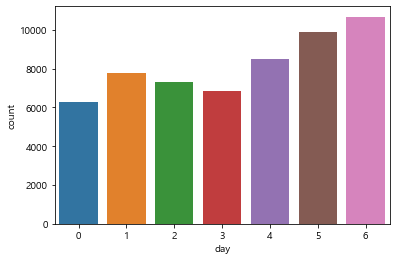

In [ ]:
### 요일별 주문 순
sns.countplot(data=comp_call, x='day')

요일별 배달 주문은 금요일부터 증가해서 일요일에 가장많음.

- 월요일은 배달 주문이 적은 편이고, 화요일에 늘어난 후, 
 수요일과 목요일에는 줄어듦


### 주별로 분류시, 2019년과 2020년이 데이터가 섞여서 그런지, 48번째 주에서 급락하는 것을 볼 수 있음. 

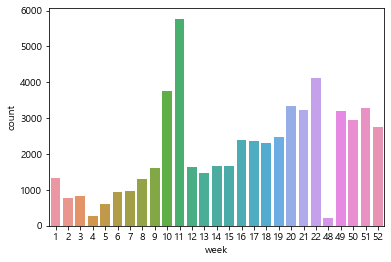

In [ ]:
### 주별
# comp_call['week'] = comp_call['PROCESS_DT'].dt.week
# sns.countplot(data=comp_call, x="week")

11주차에 가장 많고, 48주차에는 이상할 정도로 적은데?
11주차는 아마 코로나가 갑자기 퍼지기 시작한 시점인 것으로 생각되고, 48주차는?

2019년과 데이터가 뒤섞인 것으로 보임

Text(0.5, 1.0, '2019')

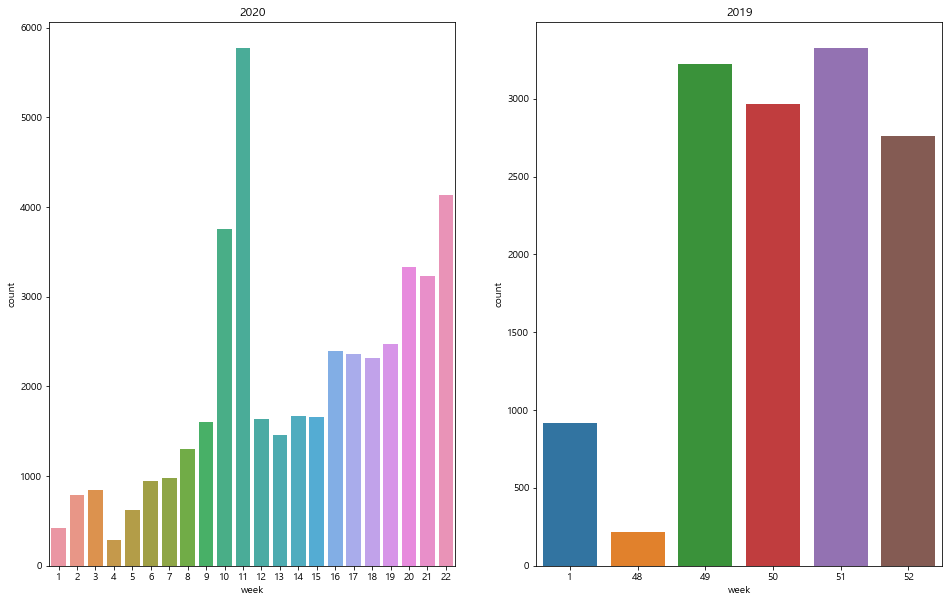

In [ ]:
### 주별
# comp19['week'] = comp19['PROCESS_DT'].dt.week
# comp20['week'] = comp20['PROCESS_DT'].dt.week
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(16,10))
sns.countplot(data=comp20, x="week", ax=ax1).set_title('2020')
sns.countplot(data=comp19, x="week", ax=ax2).set_title('2019')

In [ ]:
comp20[comp20['week']==11]

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,is_canceled,hour,day,year,week,month
3748079,6906893,2020-03-09,C000349,1,C000349,S0040845,피자,4127110400,경기도,안산시 상록구,본오동,\N,4127156000,4.12713E+11,4127110100,경기도,안산시 상록구,일동,\N,4127151000,4.12714E+11,D0009546,3850,200,22000,1,승인:NH농협카드,2020-03-09 01:44:00,2020-03-09 01:45:00,2020-03-09 01:51:00,2020-03-09 01:57:00,\N,0,1,0,2020,11,3
3748102,6906922,2020-03-09,C000349,1,C000349,S0026120,찜탕,4127110400,경기도,안산시 상록구,본오동,\N,4127154000,4.12713E+11,4127110200,경기도,안산시 상록구,이동,\N,4127151500,4.12713E+11,D0009546,3700,200,13000,2,NaN,2020-03-09 00:11:00,2020-03-09 00:12:00,2020-03-09 00:17:00,2020-03-09 00:25:00,\N,0,0,0,2020,11,3
3748106,6906929,2020-03-09,C000349,1,C000349,S0026120,찜탕,4127110400,경기도,안산시 상록구,본오동,\N,4127154000,4.12713E+11,4127110300,경기도,안산시 상록구,사동,\N,4127152500,4.12714E+11,D0009597,3800,200,11000,2,NaN,2020-03-09 01:11:00,2020-03-09 01:12:00,2020-03-09 01:28:00,2020-03-09 01:33:00,\N,0,1,0,2020,11,3
3748117,6906947,2020-03-09,C000349,1,C000349,S0040845,피자,4127110400,경기도,안산시 상록구,본오동,\N,4127156000,4.12713E+11,4127110400,경기도,안산시 상록구,본오동,\N,4127156000,4.12714E+11,D0009521,3850,200,21600,3,NaN,2020-03-09 02:31:00,2020-03-09 02:32:00,2020-03-09 02:39:00,2020-03-09 02:44:00,\N,0,2,0,2020,11,3
3748119,6906949,2020-03-09,C000349,1,C000349,S0029247,피자,4127110400,경기도,안산시 상록구,본오동,\N,4127155000,4.12713E+11,4127110300,경기도,안산시 상록구,사동,\N,4127153200,4.12713E+11,D0009546,3700,200,46800,1,승인:비씨카드사,2020-03-09 00:43:00,2020-03-09 00:52:00,2020-03-09 00:58:00,2020-03-09 01:09:00,\N,0,0,0,2020,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3920667,7172717,2020-03-15,C000032,1,C000264,S0000524,카페/디저트,1162010100,서울특별시,관악구,봉천동,\N,1162059500,1.16203E+11,1162010100,서울특별시,관악구,봉천동,\N,1162058500,1.16203E+11,D0003475,3300,300,17400,2,NaN,2020-03-15 22:15:00,2020-03-15 22:25:00,2020-03-15 22:40:00,2020-03-15 22:49:00,\N,0,22,6,2020,11,3
3921002,7173201,2020-03-15,C000328,1,C000328,S0035166,피자,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16305E+11,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16303E+11,D0009754,3300,150,18000,2,NaN,2020-03-15 22:04:00,2020-03-15 22:04:00,2020-03-15 22:17:00,2020-03-15 22:24:00,\N,0,22,6,2020,11,3
3921118,7173387,2020-03-15,C000032,1,C000166,S0000607,카페/디저트,1162010100,서울특별시,관악구,봉천동,\N,1162056500,1.16203E+11,1162010100,서울특별시,관악구,봉천동,\N,1162060500,1.16203E+11,D0006967,3300,300,15500,2,NaN,2020-03-15 21:57:00,2020-03-15 22:01:00,2020-03-15 22:02:00,2020-03-15 22:07:00,\N,0,21,6,2020,11,3
3921320,7173708,2020-03-15,C000032,1,C000264,S0000524,카페/디저트,1162010100,서울특별시,관악구,봉천동,\N,1162059500,1.16203E+11,1162010100,서울특별시,관악구,봉천동,\N,1162058500,1.16203E+11,D0003475,3300,300,18000,2,NaN,2020-03-15 22:19:00,2020-03-15 22:25:00,2020-03-15 22:40:00,2020-03-15 22:43:00,\N,0,22,6,2020,11,3


### 코로나와 배달 주문 건수의 상관관계를 확인하기 위해 코로나 데이터 확인

In [ ]:
patient = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Corona/PatientInfo.csv')
policy = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Corona/Policy.csv')

In [ ]:
patient.head(2)

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released


In [ ]:
policy.head(3)

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22


In [ ]:
patient['confirmed_date']= pd.to_datetime(patient['confirmed_date'])
patient['week'] = patient['confirmed_date'].dt.week

policy['start_date']= pd.to_datetime(policy['start_date'])
policy['week'] = policy['start_date'].dt.week

Text(0.5, 1.0, '정책')

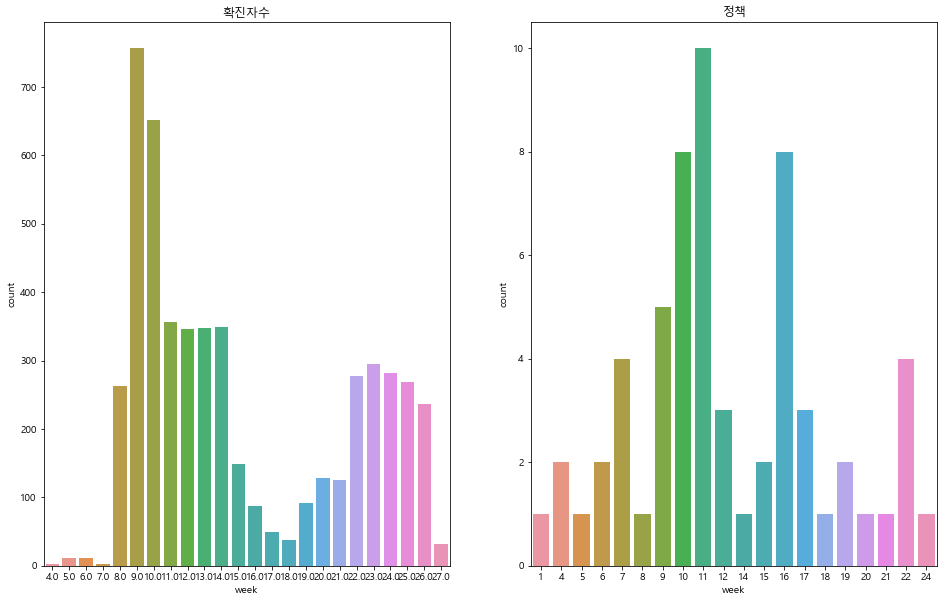

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, nrows=1, figsize=(16,10))
sns.countplot(data=patient, x='week', ax=ax1).set_title('확진자수')
sns.countplot(data=policy, x='week', ax=ax2).set_title('정책')

그래프를 통해 보면, 11주차에 확진자가 늘어난 것은 아니지만, 11주차에 정부에서 코로나에 대한 많은 정책을 펼친 것을 볼 수 있다.
이를 통해 알 수 있는 것은 11주차에 사회적 거리두기 등 여러 정책이 시행되며, 배달 음식을 많이 시켜먹게 된 것으로 볼 수 있다.

In [ ]:
comp_call['spent_time']

47        0 days 00:30:37
283       0 days 00:11:16
426       0 days 00:21:26
511       0 days 00:26:10
523       0 days 00:44:13
                ...      
4294985   0 days 00:26:00
4295446   0 days 00:26:00
4295524   0 days 00:21:00
4295698   0 days 00:27:00
4295710   0 days 00:35:00
Name: spent_time, Length: 57302, dtype: timedelta64[ns]

## 주문 시간별 주문건수 시각화

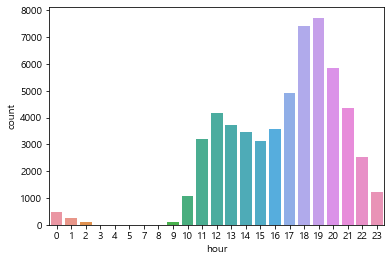

In [ ]:
# comp_call
sns.countplot(data=comp_call, x='hour')

대부분의 주문은 오후, 저녁시간
오전 시간에는 주문이 적고, 점심 시간 즈음부터 늘기 시작하고, 오후 3시쯤(대부분 식당의 브레이크타임)줄고, 이후 증가하며
18시와 19시에 가장 피크를 찍고, 이후 점점 줄어드는 편

## 시간별 업종별 주문수 시각화

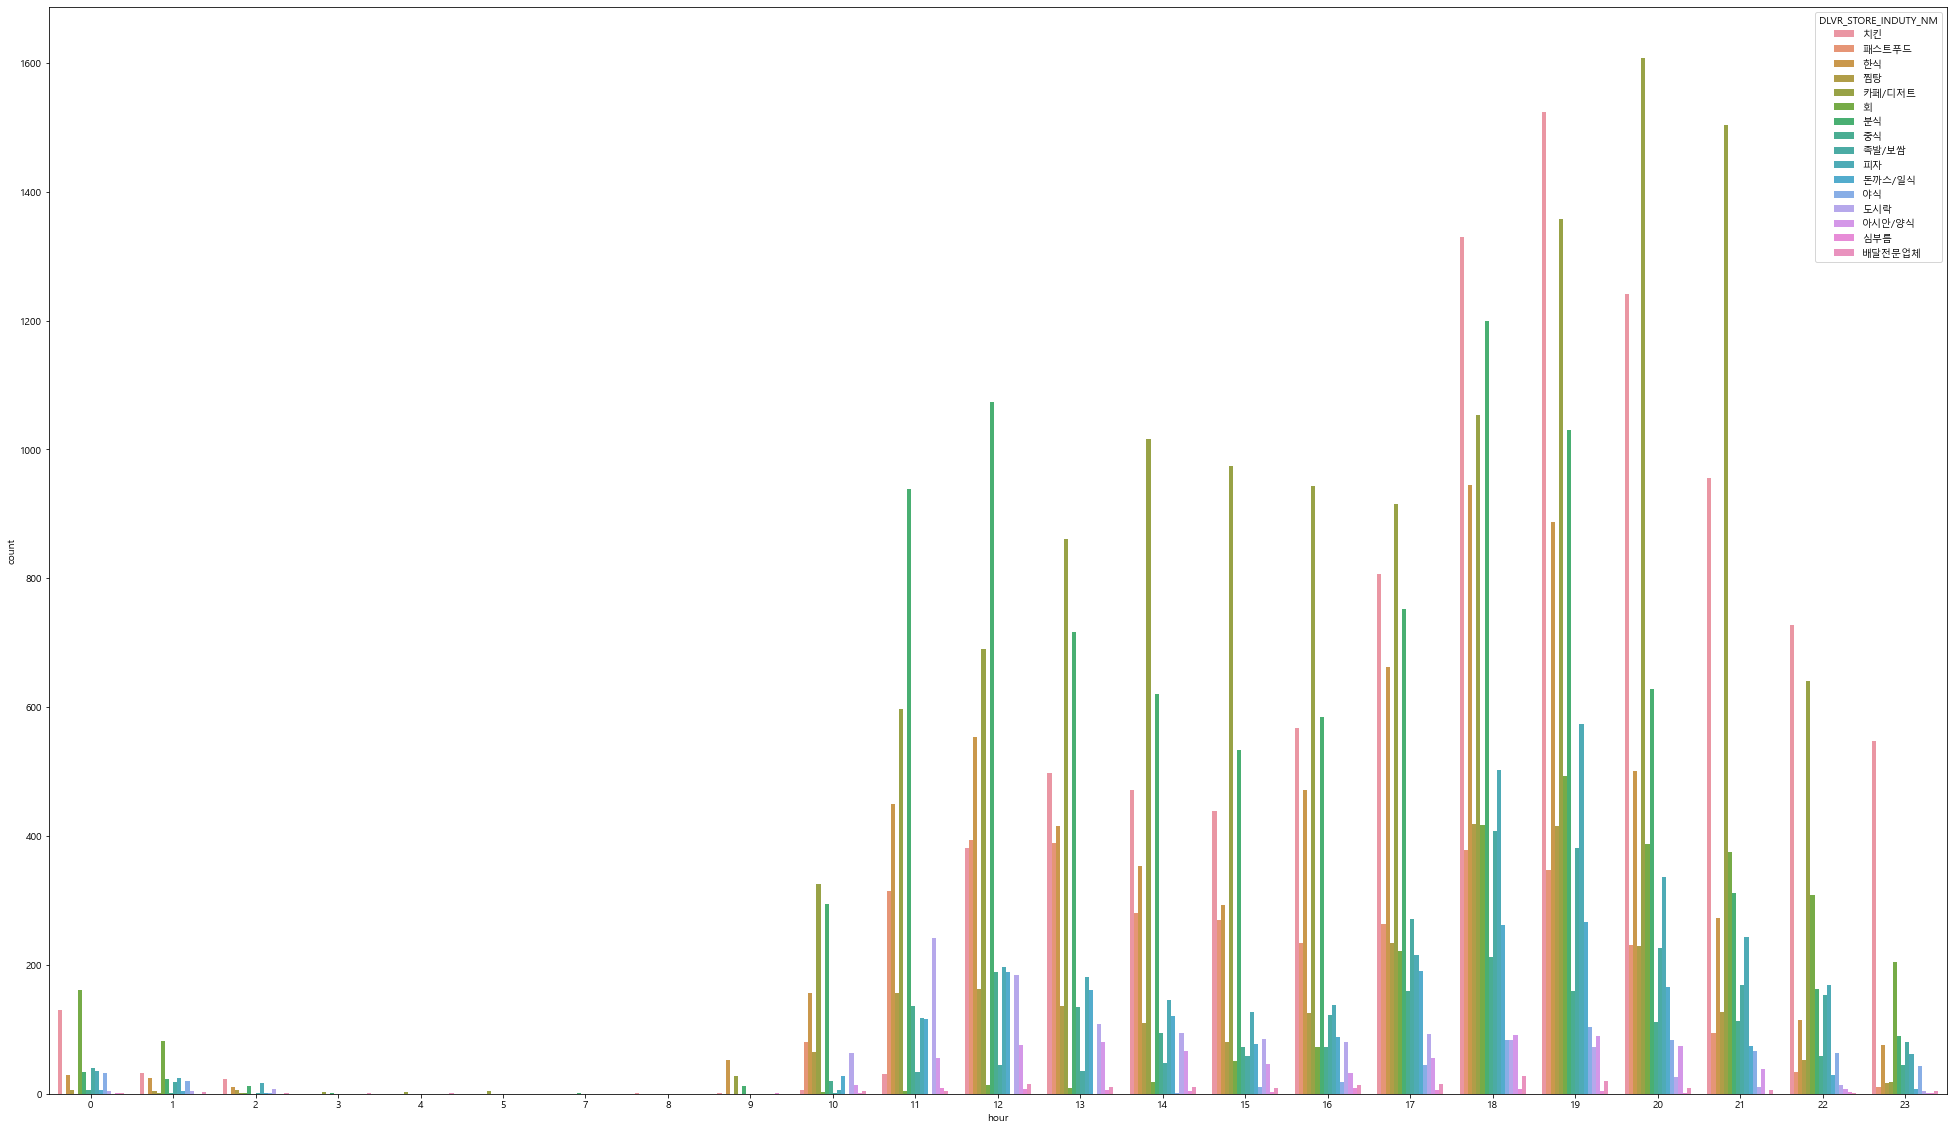

In [ ]:
plt.figure(figsize=(34,20))
sns.countplot(data=comp_call, x='hour', hue='DLVR_STORE_INDUTY_NM')

저녁시간(오후 5시 이후로, 치킨은 대부분 주문건수가 상위권이며, 오후 8시~9시까지 카페/디저트의 주문건수가 늘어남
분식은 오후 8시 이전까지는 꾸준히 상위권, 이후 급감.

## 배달 시간별 그룹화


In [ ]:
import datetime
import time
gr1 = '00:16:48'
gr2 = '00:21:00'
gr3 = '00:24:04'
gr4 = '00:27:00'
gr5 = '00:33:29'
gr6 = '00:40:00'
gr7 = '00:53:44'
group1 =  int(gr1[3:5]) * 60 + int(gr1[6:8])
group2 =  int(gr2[3:5]) * 60 + int(gr2[6:8])
group3 =  int(gr3[3:5]) * 60 + int(gr3[6:8])
group4 =  int(gr4[3:5]) * 60 + int(gr4[6:8])
group5 =  int(gr5[3:5]) * 60 + int(gr5[6:8])
group6 =  int(gr6[3:5]) * 60 + int(gr6[6:8])
group7 =  int(gr7[3:5]) * 60 + int(gr7[6:8])


In [ ]:
def make_group(sent):
  
  if sent < datetime.timedelta(seconds=group1):
    grouped = 0
    return grouped
  elif sent >= datetime.timedelta(seconds=group1) and sent < datetime.timedelta(seconds=group2):
    grouped = 1
    return grouped
  elif sent >= datetime.timedelta(seconds=group2) and sent < datetime.timedelta(seconds=group3):
    grouped = 2
    return grouped
  elif sent >= datetime.timedelta(seconds=group3) and sent < datetime.timedelta(seconds=group4):
    grouped = 3
    return grouped
  elif sent >= datetime.timedelta(seconds=group4) and sent < datetime.timedelta(seconds=group5):
    grouped = 4
    return grouped
  elif sent >= datetime.timedelta(seconds=group5) and sent < datetime.timedelta(seconds=group6):
    grouped = 5
    return grouped
  elif sent >= datetime.timedelta(seconds=group6) and sent < datetime.timedelta(seconds=group7):
    grouped = 6
    return grouped
  elif sent >= datetime.timedelta(seconds=group7):
    grouped = 7
    return grouped


In [ ]:
comp_call['spent_group'] = comp_call['spent_time'].apply(lambda x: make_group(x))
comp_call

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,is_canceled,hour,day,year,spent_time,spent_group
47,3487000,2019-12-01,C000213,1,C000213,S0003056,치킨,1130510100,서울특별시,강북구,미아동,\N,1130553400,113053005042,1129013300,서울특별시,성북구,정릉동,\N,1129063000,112903107006,D0005477,3300,300,27000,1,승인:신한카드,2019-12-01 22:22:09,2019-12-01 22:24:23,2019-12-01 22:33:02,2019-12-01 22:52:46,\N,0,22,6,2019,0 days 00:30:37,4
283,3487381,2019-12-01,C000213,1,C000213,S0027075,패스트푸드,1129013300,서울특별시,성북구,정릉동,\N,1129062000,112903107006,1129013300,서울특별시,성북구,정릉동,\N,1129065000,112904121377,D0004179,3000,300,0,2,NaN,2019-12-01 20:35:17,2019-12-01 20:35:36,2019-12-01 20:43:55,2019-12-01 20:46:33,\N,0,20,6,2019,0 days 00:11:16,0
426,3487618,2019-12-01,C000213,1,C000213,S0003056,치킨,1130510100,서울특별시,강북구,미아동,\N,1130553400,113053005042,1130510100,서울특별시,강북구,미아동,\N,1130557500,113054124223,D0005241,3000,300,19000,2,NaN,2019-12-01 22:24:04,2019-12-01 22:28:55,2019-12-01 22:38:47,2019-12-01 22:45:30,\N,0,22,6,2019,0 days 00:21:26,2
511,3487750,2019-12-01,C000213,1,C000213,S0022926,한식,1130510100,서울특별시,강북구,미아동,\N,1130555500,113053005042,1130510100,서울특별시,강북구,미아동,\N,1130553500,113054124337,D0005241,3000,300,47000,2,NaN,2019-12-01 21:07:27,2019-12-01 21:07:50,2019-12-01 21:22:11,2019-12-01 21:33:37,\N,0,21,6,2019,0 days 00:26:10,3
523,3487769,2019-12-01,C000213,1,C000213,S0003056,치킨,1130510100,서울특별시,강북구,미아동,\N,1130553400,113053005042,1129013300,서울특별시,성북구,정릉동,\N,1129064000,112904121641,D0004121,4200,300,24000,2,NaN,2019-12-01 18:40:47,2019-12-01 18:57:21,2019-12-01 19:07:37,2019-12-01 19:25:00,\N,0,18,6,2019,0 days 00:44:13,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4294985,7748560,2020-03-31,C000328,1,C000328,S0035166,피자,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16305E+11,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16303E+11,D0008583,3300,150,0,2,NaN,2020-03-31 21:41:00,2020-03-31 21:42:00,2020-03-31 22:00:00,2020-03-31 22:07:00,\N,0,21,1,2020,0 days 00:26:00,3
4295446,7749287,2020-03-31,C000328,1,C000328,S0025717,치킨,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16305E+11,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16305E+11,D0009754,3300,150,22000,1,승인:현대카드사,2020-03-31 22:28:00,2020-03-31 22:33:00,2020-03-31 22:46:00,2020-03-31 22:54:00,\N,0,22,1,2020,0 days 00:26:00,3
4295524,7749403,2020-03-31,C000032,1,C000264,S0000551,카페/디저트,1159010100,서울특별시,동작구,노량진동,\N,1159051000,1.15903E+11,1159010100,서울특별시,동작구,노량진동,\N,1159052000,1.15904E+11,D0003475,3300,300,15500,2,NaN,2020-03-31 22:22:00,2020-03-31 22:22:00,2020-03-31 22:35:00,2020-03-31 22:43:00,\N,0,22,1,2020,0 days 00:21:00,2
4295698,7749682,2020-03-31,C000328,1,C000328,S0025717,치킨,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16305E+11,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16303E+11,D0009754,3300,150,20000,1,승인:비씨카드사,2020-03-31 22:58:00,2020-03-31 22:58:00,2020-03-31 23:17:00,2020-03-31 23:25:00,\N,0,22,1,2020,0 days 00:27:00,4


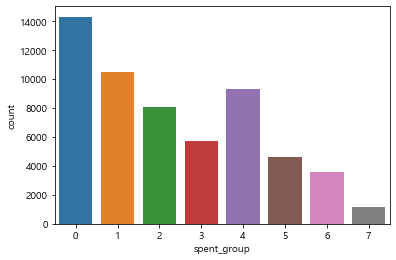

In [ ]:
## 소요시간 별 주문
sns.countplot(data=comp_call, x='spent_group')

- gr1 = '00:16:48'
- gr2 = '00:21:00'
- gr3 = '00:24:04'
- gr4 = '00:27:00'
- gr5 = '00:33:29'
- gr6 = '00:40:00'
- gr7 = '00:53:44'
 ### 0번 그룹의 경우 가장 많은 편인데, 16분48초 이내에 배달완료 된 경우,
 이후로 계속해서 줄다가, 4번 그룹, 24분 04초에서 27분 사이의 그룹이 많은 편

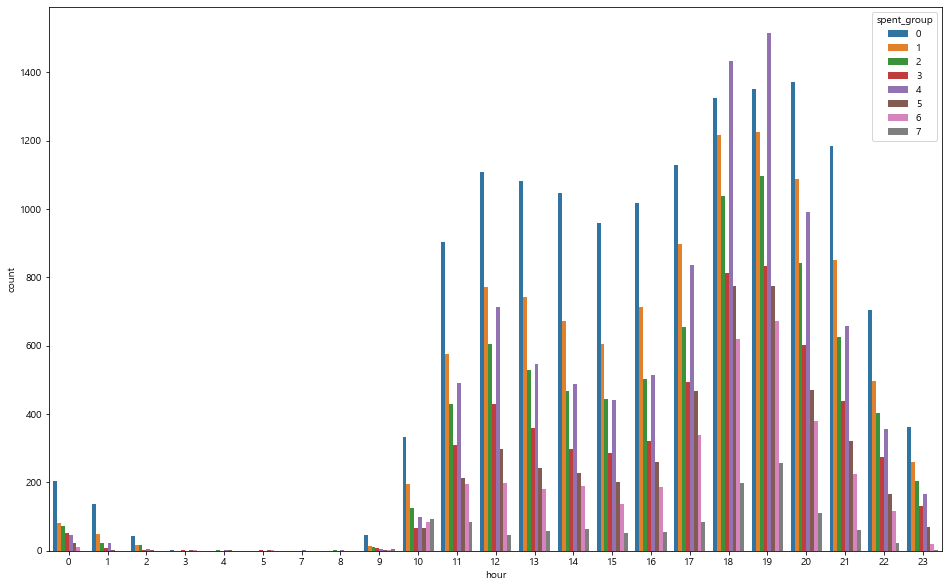

In [ ]:
plt.figure(figsize=(16,10))
sns.countplot(data=comp_call, x='hour', hue='spent_group')

### 시간별, 배달소요시간별 주문 건수 시각화
- 대부분 0번 그룹이 가장 많은 편
다만 오후 5시 이후부터, 1번 그룹 및 4번 그룹이 급격히 늘고, 오후 9시 이후부터 줄어듦
- 주문 배달 건수가 가장 늘어나는 시점이 18시 ~ 20시 사이 이므로, 이 시간에는 배달 소요시간이 많이 걸리는 편
-> 그럼에도 불구하고, 0번 그룹이 생각보다 많음

In [ ]:
### 배달 소요시간에 따른 재주문 현황 보기

## 각각 상점별 id가 있으므로 상점별 주문 소요시간을 볼 수 있고, 이를 통해서 주문의 편차를 비교
### 그리고 같은 업종, ex. 치킨이면 치킨 같은 같은 업종끼리 비교
comp_call.groupby('DLVR_STORE_ID')['spent_group'].count().sort_values(ascending = False)[:10]
pop_st = comp_call.groupby('DLVR_STORE_ID')['spent_group'].count().sort_values(ascending = False)[:10].index.to_list()
# sns.countplot(data=comp_call, x='DLVR_STORE_ID', hue='spent_group')

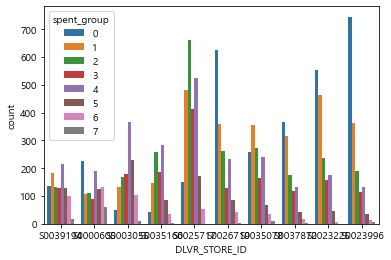

In [ ]:
pop_store = comp_call[comp_call['DLVR_STORE_ID'].isin(pop_st)]
sns.countplot(data=pop_store, x='DLVR_STORE_ID', hue='spent_group')

In [ ]:
comp_call.groupby('DLVR_STORE_ID')['GOODS_AMOUNT'].sum().sort_values(ascending = False).reset_index()

,DLVR_STORE_ID,GOODS_AMOUNT
0,S0023996,46943880
1,S0025717,44707202
2,S0023225,33523500
3,S0035078,32051200
4,S0026719,30423070
...,...,...
1009,S0002908,0
1010,S0029167,0
1011,S0036446,0
1012,S0039766,0


In [ ]:
total_am = pd.DataFrame(comp_call.groupby('DLVR_STORE_ID')['GOODS_AMOUNT'].sum().sort_values(ascending = False).reset_index())
total_am.rename(columns={'GOODS_AMOUNT':'total_sales'}, inplace=True)


# 주 데이터에 유저ID별_결제건수_합과 고객등급에 관한 컬럼 merge
df = pd.merge(comp_call, total_am, how='left', on='DLVR_STORE_ID')
df

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,is_canceled,hour,day,year,spent_time,spent_group,total_sales
0,3487000,2019-12-01,C000213,1,C000213,S0003056,치킨,1130510100,서울특별시,강북구,미아동,\N,1130553400,113053005042,1129013300,서울특별시,성북구,정릉동,\N,1129063000,112903107006,D0005477,3300,300,27000,1,승인:신한카드,2019-12-01 22:22:09,2019-12-01 22:24:23,2019-12-01 22:33:02,2019-12-01 22:52:46,\N,0,22,6,2019,0 days 00:30:37,4,2776100
1,3487381,2019-12-01,C000213,1,C000213,S0027075,패스트푸드,1129013300,서울특별시,성북구,정릉동,\N,1129062000,112903107006,1129013300,서울특별시,성북구,정릉동,\N,1129065000,112904121377,D0004179,3000,300,0,2,NaN,2019-12-01 20:35:17,2019-12-01 20:35:36,2019-12-01 20:43:55,2019-12-01 20:46:33,\N,0,20,6,2019,0 days 00:11:16,0,953300
2,3487618,2019-12-01,C000213,1,C000213,S0003056,치킨,1130510100,서울특별시,강북구,미아동,\N,1130553400,113053005042,1130510100,서울특별시,강북구,미아동,\N,1130557500,113054124223,D0005241,3000,300,19000,2,NaN,2019-12-01 22:24:04,2019-12-01 22:28:55,2019-12-01 22:38:47,2019-12-01 22:45:30,\N,0,22,6,2019,0 days 00:21:26,2,2776100
3,3487750,2019-12-01,C000213,1,C000213,S0022926,한식,1130510100,서울특별시,강북구,미아동,\N,1130555500,113053005042,1130510100,서울특별시,강북구,미아동,\N,1130553500,113054124337,D0005241,3000,300,47000,2,NaN,2019-12-01 21:07:27,2019-12-01 21:07:50,2019-12-01 21:22:11,2019-12-01 21:33:37,\N,0,21,6,2019,0 days 00:26:10,3,61000
4,3487769,2019-12-01,C000213,1,C000213,S0003056,치킨,1130510100,서울특별시,강북구,미아동,\N,1130553400,113053005042,1129013300,서울특별시,성북구,정릉동,\N,1129064000,112904121641,D0004121,4200,300,24000,2,NaN,2019-12-01 18:40:47,2019-12-01 18:57:21,2019-12-01 19:07:37,2019-12-01 19:25:00,\N,0,18,6,2019,0 days 00:44:13,6,2776100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57297,7748560,2020-03-31,C000328,1,C000328,S0035166,피자,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16305E+11,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16303E+11,D0008583,3300,150,0,2,NaN,2020-03-31 21:41:00,2020-03-31 21:42:00,2020-03-31 22:00:00,2020-03-31 22:07:00,\N,0,21,1,2020,0 days 00:26:00,3,24405700
57298,7749287,2020-03-31,C000328,1,C000328,S0025717,치킨,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16305E+11,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16305E+11,D0009754,3300,150,22000,1,승인:현대카드사,2020-03-31 22:28:00,2020-03-31 22:33:00,2020-03-31 22:46:00,2020-03-31 22:54:00,\N,0,22,1,2020,0 days 00:26:00,3,44707202
57299,7749403,2020-03-31,C000032,1,C000264,S0000551,카페/디저트,1159010100,서울특별시,동작구,노량진동,\N,1159051000,1.15903E+11,1159010100,서울특별시,동작구,노량진동,\N,1159052000,1.15904E+11,D0003475,3300,300,15500,2,NaN,2020-03-31 22:22:00,2020-03-31 22:22:00,2020-03-31 22:35:00,2020-03-31 22:43:00,\N,0,22,1,2020,0 days 00:21:00,2,18230900
57300,7749682,2020-03-31,C000328,1,C000328,S0025717,치킨,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16305E+11,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16303E+11,D0009754,3300,150,20000,1,승인:비씨카드사,2020-03-31 22:58:00,2020-03-31 22:58:00,2020-03-31 23:17:00,2020-03-31 23:25:00,\N,0,22,1,2020,0 days 00:27:00,4,44707202


In [ ]:
pop_store['total_sales'] = df['total_sales']
# sns.countplot(data=pop_store, x='DLVR_STORE_ID', hue='spent_group')

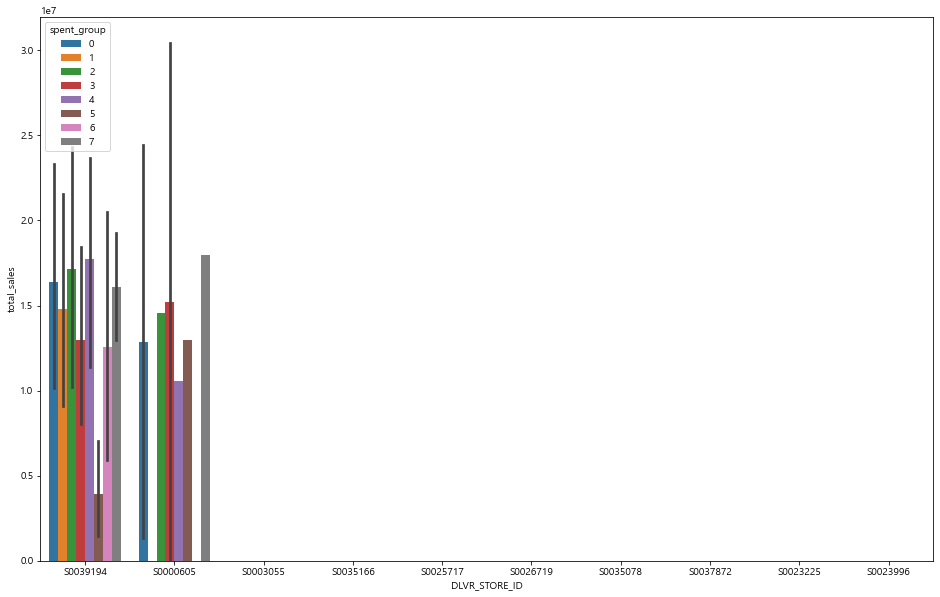

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize = (16,10))
sns.barplot(data=pop_store,x='DLVR_STORE_ID',y='total_sales', hue='spent_group', ax=ax)

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(df['spent_time'])
df['enc_time']= enc.transform(df['spent_time'])


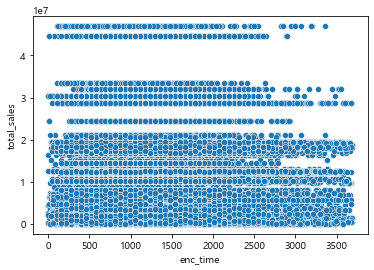

In [ ]:
# comp_call
sns.scatterplot(data=df,x='enc_time',y='total_sales')
# sns.regplot(data=df,x='enc_time',y='total_sales')

변환된 소요시간과 총 매출액과의 관계를 보기 위해, 산점도를 그려봤는데, 큰 의미는 없는 걸로 보임.

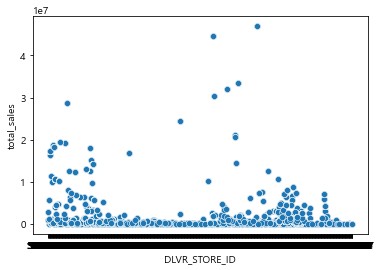

In [ ]:
sns.scatterplot(data=df,x='DLVR_STORE_ID',y='total_sales')

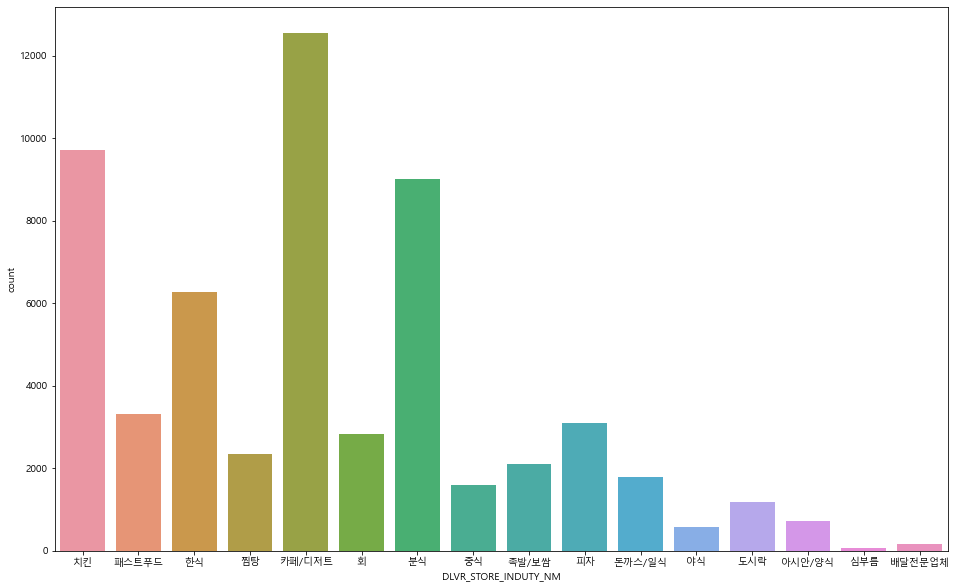

In [ ]:
plt.subplots(figsize=(16,10))
sns.countplot(data=df, x= 'DLVR_STORE_INDUTY_NM')

### 2시간 이상 걸리는 자료를 드랍한 후 확인하면, 카페/디저트의 주문량은 여전히 많지만, 치킨의 주문량이 많이 줄어든 것을 볼 수 있다. -> 아래의 그래프와 비교

그렇다면 2시간 이상 걸리는 자료를 드랍하면 안되는 걸까???
->
### 배달 시간이 2시간이 넘었던 업종별 주문수,

패스트푸드     42  
도시락       33  
카페/디저트    17  
족발/보쌈     10  
치킨         3  
중식         2  
한식         1  
야식         1  
찜탕         1  
아시안/양식     1  
Name: DLVR_STORE_INDUTY_NM, dtype: int64

위와 같을 경우, 치킨의 데이터가 많이 줄어들면 안되는데, 왜 이러지???

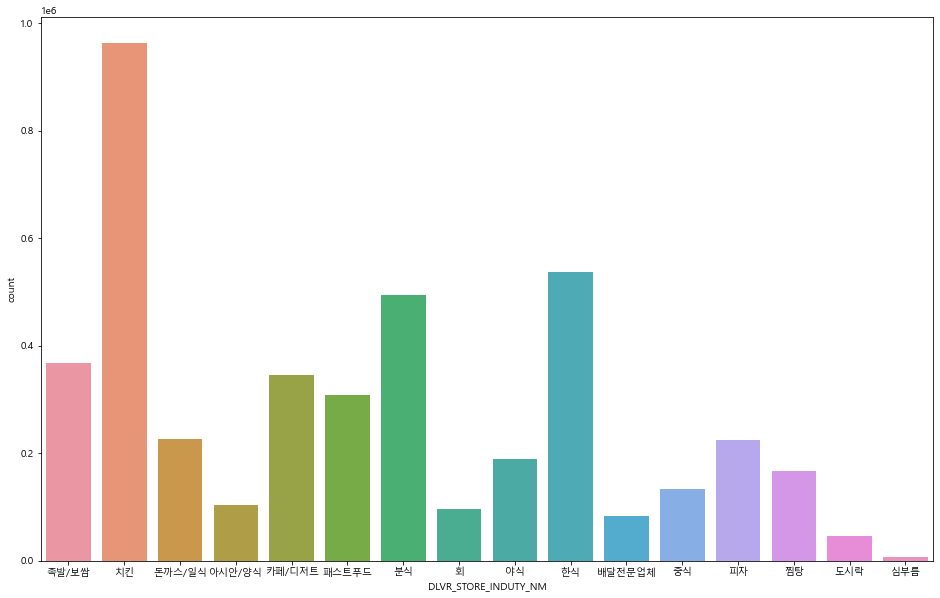

In [ ]:
plt.subplots(figsize=(16,10))
sns.countplot(data=dlvr_call, x= 'DLVR_STORE_INDUTY_NM')

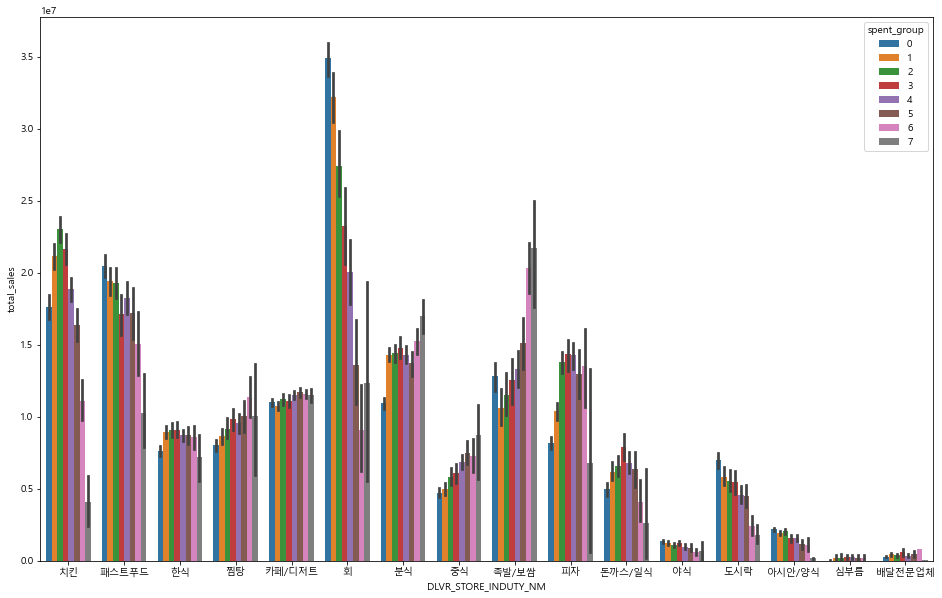

In [ ]:
plt.subplots(figsize=(16,10))
sns.barplot(data=df, x= 'DLVR_STORE_INDUTY_NM', y='total_sales', hue='spent_group')

패스트푸드, 회 경우 소요시간이 적은 경우가 돈을 많이 벌었다.
족발 보쌈은 특이하게도, 시간이 가장 적게 걸린 경우, 외에 시간이 많이 걸린 경우가 매출이 높았다.

### 이를 통해 볼 수 있는 유의미한 결과는 패스트푸드, 찜/탕, 야식, 도시락, 아시안/양식 업종은 배달 소요시간과 매출의 유의미한 상관관계가 있다고 볼 수 있다.


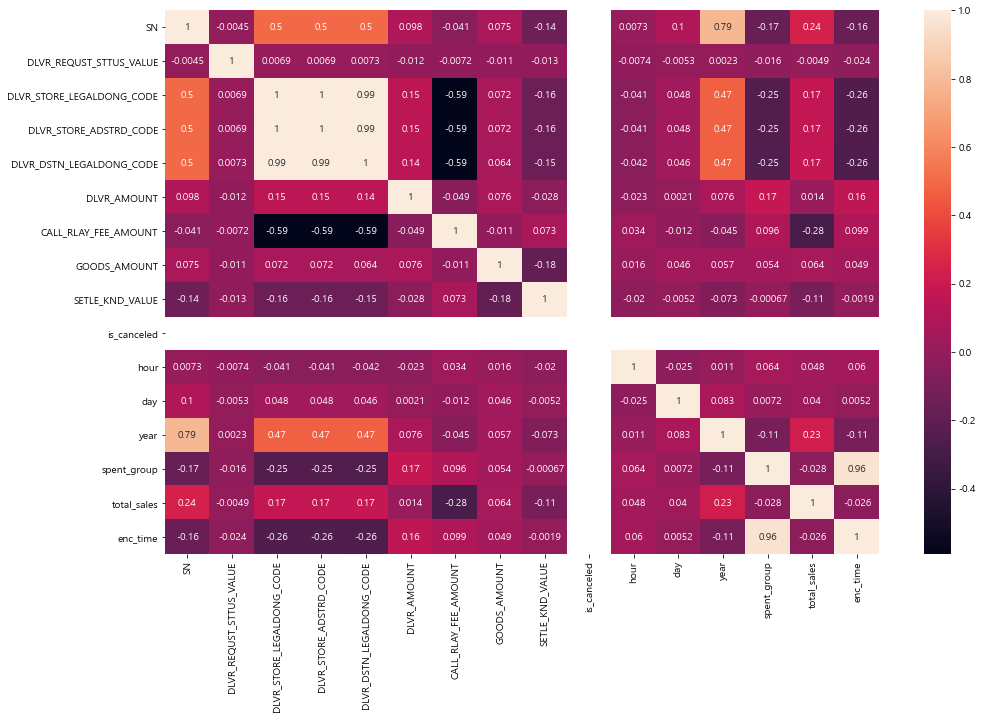

In [ ]:
df.corr().query('total_sales > 0.3 or total_sales < -0.3')
df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)

### 배달 주문 건수를 코로나 이전인 2019년과 2020년 으로 비교
- 코로나 이후, 2020 년의 주문건수가 확연히 증가한 모습을 볼 수 있음

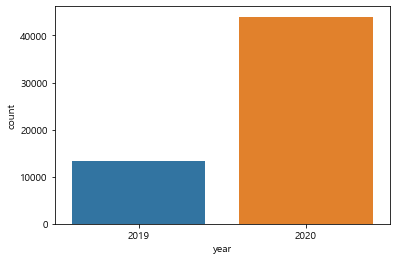

In [ ]:
sns.countplot(data=df, x='year')

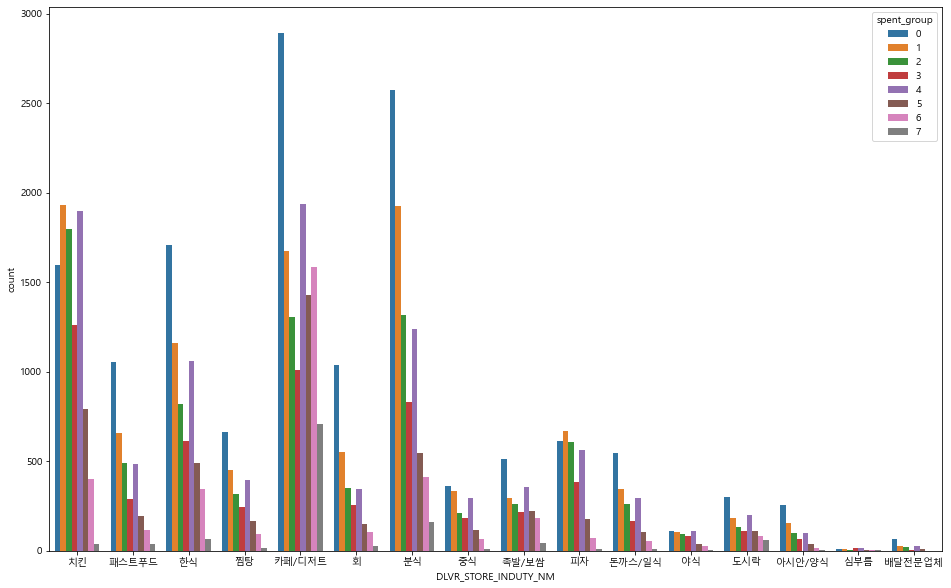

In [ ]:
## 업종별 배달 소요시간에 따른 그룹분류
fig, ax = plt.subplots(figsize=(16,10))
sns.countplot(data=df, x='DLVR_STORE_INDUTY_NM', hue='spent_group')

대부분 0번 그룹이 더 많은 모습을 볼 수 있다.   
-> 특히 카페/디저트의 특성상 준비시간이 오래 걸리지 않아서 그런 것으로 볼 수 있다. 
- 하지만 의외로 4,5,6 그룹도 많은 편

-> 패스트 푸드의 경우도 마찬가지로 1번 그룹이 대부분이지만, 0번 그룹도 비슷하게 많은 것을 볼 수 있었다. 
전체적으로 조리시간이 짧을 것으로 예상되는 음식들, 카페/디저트, 패스트푸드, 분식 등은 배달시간이 오래 걸리지 않는 것으로 볼 수 있었다.


### 카페/디저트 에서 4,5,6번 그룹이 많은 이유?
- 아무래도 카페/디저트 업종에서는 배달 시간이 짧을 것으로 예상했지만, 배달시간이 오래걸리는 이유를 알기 위함

1. 일단 지역별로 확인

In [ ]:
df[(df['spent_group'] >=4) & (df['DLVR_STORE_INDUTY_NM'] == '카페/디저트')]['DLVR_STORE_SIGNGU_NM'].value_counts()

관악구         2976
동작구         2037
성북구          255
강북구           88
고양시 일산서구      88
평택시           68
성남시 수정구       48
양천구           36
의정부시          20
화성시           18
안산시 상록구       15
시흥시           12
광명시            2
구로구            1
영등포구           1
부천시            1
Name: DLVR_STORE_SIGNGU_NM, dtype: int64

### 지역별 특이점이 있는 것으로도 생각됨

In [ ]:
df[(df['spent_group'] >=4) & (df['DLVR_STORE_INDUTY_NM'] == '카페/디저트') & (df['DLVR_STORE_SIGNGU_NM'] == '관악구')]

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,is_canceled,hour,day,year,spent_time,spent_group,total_sales,enc_time
7,3487961,2019-12-01,C000032,1,C000166,S0000661,카페/디저트,1162010200,서울특별시,관악구,신림동,\N,1162064500,116203120005,1162010200,서울특별시,관악구,신림동,\N,1162069500,116204160229,D0006275,4300,300,28000,2,NaN,2019-12-01 21:05:03,2019-12-01 21:09:03,2019-12-01 21:16:02,2019-12-01 21:39:13,\N,0,21,6,2019,0 days 00:34:10,5,5568500,1786
53,3546355,2019-12-01,C000032,1,C000166,S0000661,카페/디저트,1162010200,서울특별시,관악구,신림동,\N,1162064500,116203120005,1162010200,서울특별시,관악구,신림동,\N,1162065500,116204160327,D0006275,4300,300,26200,2,NaN,2019-12-01 20:58:59,2019-12-01 21:14:11,2019-12-01 21:16:00,2019-12-01 21:48:33,\N,0,20,6,2019,0 days 00:49:34,6,5568500,2691
57,3546606,2019-12-01,C000032,1,C000166,S0000661,카페/디저트,1162010200,서울특별시,관악구,신림동,\N,1162064500,116203120005,1162010100,서울특별시,관악구,봉천동,\N,1162052500,116204160409,D0006275,4300,300,15500,2,NaN,2019-12-01 19:36:12,2019-12-01 20:43:05,2019-12-01 21:16:03,2019-12-01 21:23:38,\N,0,19,6,2019,0 days 01:47:26,7,5568500,3665
177,3555234,2019-12-01,C000032,1,C000166,S0000605,카페/디저트,1162010100,서울특별시,관악구,봉천동,\N,1162052500,116203005083,1162010100,서울특별시,관악구,봉천동,\N,1162060500,116204160427,D0003630,3600,300,16400,2,NaN,2019-12-01 21:43:24,2019-12-01 21:53:50,2019-12-01 22:04:01,2019-12-01 22:10:50,\N,0,21,6,2019,0 days 00:27:26,4,19367100,1382
181,3555444,2019-12-01,C000032,1,C000166,S0000605,카페/디저트,1162010100,서울특별시,관악구,봉천동,\N,1162052500,116203005083,1162010200,서울특별시,관악구,신림동,\N,1162069500,116204160547,D0003630,3300,300,19000,2,NaN,2019-12-01 21:41:24,2019-12-01 21:53:57,2019-12-01 22:03:59,2019-12-01 22:17:20,\N,0,21,6,2019,0 days 00:35:56,5,19367100,1892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57137,7726128,2020-03-31,C000032,1,C000166,S0000524,카페/디저트,1162010100,서울특별시,관악구,봉천동,\N,1162059500,1.16203E+11,1162010100,서울특별시,관악구,봉천동,\N,1162058500,1.16203E+11,D0010206,4500,300,22000,2,NaN,2020-03-31 15:34:00,2020-03-31 15:37:00,2020-03-31 15:50:00,2020-03-31 16:05:00,\N,0,15,1,2020,0 days 00:31:00,4,12483600,1596
57152,7727026,2020-03-31,C000032,1,C000166,S0000660,카페/디저트,1162010200,서울특별시,관악구,신림동,\N,1162073500,1.16203E+11,1162010200,서울특별시,관악구,신림동,\N,1162074500,1.16203E+11,D0006967,3300,300,22000,2,NaN,2020-03-31 16:19:00,2020-03-31 16:29:00,2020-03-31 16:56:00,2020-03-31 17:03:00,\N,0,16,1,2020,0 days 00:44:00,6,17990200,2371
57238,7740799,2020-03-31,C000032,1,C000264,S0000605,카페/디저트,1162010100,서울특별시,관악구,봉천동,\N,1162052500,1.16203E+11,1162010100,서울특별시,관악구,봉천동,\N,1162052500,1.16204E+11,D0003483,3300,300,22000,2,NaN,2020-03-31 19:30:00,2020-03-31 19:52:00,2020-03-31 19:56:00,2020-03-31 20:01:00,\N,0,19,1,2020,0 days 00:31:00,4,19367100,1596
57251,7742035,2020-03-31,C000032,1,C000166,S0000661,카페/디저트,1162010200,서울특별시,관악구,신림동,\N,1162064500,1.16203E+11,1162010200,서울특별시,관악구,신림동,\N,1162064500,1.16204E+11,D0003613,4300,300,22000,2,NaN,2020-03-31 20:00:00,2020-03-31 20:15:00,2020-03-31 20:26:00,2020-03-31 20:29:00,\N,0,20,1,2020,0 days 00:29:00,4,5568500,1476


### 혹시 음식점에서 배달을 요청한 업체와 대행업체가 달라서 배달 시간이 늘어나는 것일까?

In [ ]:
df.query('DLVR_REQUST_ENTRPS_ID != DLVR_RCEPT_ENTRPS_ID')['spent_group'].value_counts()

0    3891
4    3028
1    2675
2    2125
6    1971
5    1950
3    1629
7     793
Name: spent_group, dtype: int64

배달 소요시간 0번 그룹이 많은 경향이 있지만, 4번 그룹도 있기 때문에, 어느정도는 영향이 있을 것으로 생각됨.

In [ ]:
df[(df['spent_group'] >=4) & (df['DLVR_STORE_INDUTY_NM'] == '카페/디저트') & (df['DLVR_STORE_SIGNGU_NM'] == '관악구') & (df['DLVR_REQUST_ENTRPS_ID']=='C000032')]

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,is_canceled,hour,day,year,spent_time,spent_group,total_sales,enc_time
7,3487961,2019-12-01,C000032,1,C000166,S0000661,카페/디저트,1162010200,서울특별시,관악구,신림동,\N,1162064500,116203120005,1162010200,서울특별시,관악구,신림동,\N,1162069500,116204160229,D0006275,4300,300,28000,2,NaN,2019-12-01 21:05:03,2019-12-01 21:09:03,2019-12-01 21:16:02,2019-12-01 21:39:13,\N,0,21,6,2019,0 days 00:34:10,5,5568500,1786
53,3546355,2019-12-01,C000032,1,C000166,S0000661,카페/디저트,1162010200,서울특별시,관악구,신림동,\N,1162064500,116203120005,1162010200,서울특별시,관악구,신림동,\N,1162065500,116204160327,D0006275,4300,300,26200,2,NaN,2019-12-01 20:58:59,2019-12-01 21:14:11,2019-12-01 21:16:00,2019-12-01 21:48:33,\N,0,20,6,2019,0 days 00:49:34,6,5568500,2691
57,3546606,2019-12-01,C000032,1,C000166,S0000661,카페/디저트,1162010200,서울특별시,관악구,신림동,\N,1162064500,116203120005,1162010100,서울특별시,관악구,봉천동,\N,1162052500,116204160409,D0006275,4300,300,15500,2,NaN,2019-12-01 19:36:12,2019-12-01 20:43:05,2019-12-01 21:16:03,2019-12-01 21:23:38,\N,0,19,6,2019,0 days 01:47:26,7,5568500,3665
177,3555234,2019-12-01,C000032,1,C000166,S0000605,카페/디저트,1162010100,서울특별시,관악구,봉천동,\N,1162052500,116203005083,1162010100,서울특별시,관악구,봉천동,\N,1162060500,116204160427,D0003630,3600,300,16400,2,NaN,2019-12-01 21:43:24,2019-12-01 21:53:50,2019-12-01 22:04:01,2019-12-01 22:10:50,\N,0,21,6,2019,0 days 00:27:26,4,19367100,1382
181,3555444,2019-12-01,C000032,1,C000166,S0000605,카페/디저트,1162010100,서울특별시,관악구,봉천동,\N,1162052500,116203005083,1162010200,서울특별시,관악구,신림동,\N,1162069500,116204160547,D0003630,3300,300,19000,2,NaN,2019-12-01 21:41:24,2019-12-01 21:53:57,2019-12-01 22:03:59,2019-12-01 22:17:20,\N,0,21,6,2019,0 days 00:35:56,5,19367100,1892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57137,7726128,2020-03-31,C000032,1,C000166,S0000524,카페/디저트,1162010100,서울특별시,관악구,봉천동,\N,1162059500,1.16203E+11,1162010100,서울특별시,관악구,봉천동,\N,1162058500,1.16203E+11,D0010206,4500,300,22000,2,NaN,2020-03-31 15:34:00,2020-03-31 15:37:00,2020-03-31 15:50:00,2020-03-31 16:05:00,\N,0,15,1,2020,0 days 00:31:00,4,12483600,1596
57152,7727026,2020-03-31,C000032,1,C000166,S0000660,카페/디저트,1162010200,서울특별시,관악구,신림동,\N,1162073500,1.16203E+11,1162010200,서울특별시,관악구,신림동,\N,1162074500,1.16203E+11,D0006967,3300,300,22000,2,NaN,2020-03-31 16:19:00,2020-03-31 16:29:00,2020-03-31 16:56:00,2020-03-31 17:03:00,\N,0,16,1,2020,0 days 00:44:00,6,17990200,2371
57238,7740799,2020-03-31,C000032,1,C000264,S0000605,카페/디저트,1162010100,서울특별시,관악구,봉천동,\N,1162052500,1.16203E+11,1162010100,서울특별시,관악구,봉천동,\N,1162052500,1.16204E+11,D0003483,3300,300,22000,2,NaN,2020-03-31 19:30:00,2020-03-31 19:52:00,2020-03-31 19:56:00,2020-03-31 20:01:00,\N,0,19,1,2020,0 days 00:31:00,4,19367100,1596
57251,7742035,2020-03-31,C000032,1,C000166,S0000661,카페/디저트,1162010200,서울특별시,관악구,신림동,\N,1162064500,1.16203E+11,1162010200,서울특별시,관악구,신림동,\N,1162064500,1.16204E+11,D0003613,4300,300,22000,2,NaN,2020-03-31 20:00:00,2020-03-31 20:15:00,2020-03-31 20:26:00,2020-03-31 20:29:00,\N,0,20,1,2020,0 days 00:29:00,4,5568500,1476


In [ ]:
df[(df['spent_group'] >=4) & (df['DLVR_STORE_INDUTY_NM'] == '카페/디저트') & (df['DLVR_STORE_SIGNGU_NM'] == '관악구') & (df['DLVR_REQUST_ENTRPS_ID']=='C000032')]['DLVR_RCEPT_ENTRPS_ID'].unique()

array(['C000166', 'C000264', 'C000436'], dtype=object)

In [ ]:
df[(df['spent_group'] >=4) & (df['DLVR_STORE_INDUTY_NM'] == '카페/디저트') & (df['DLVR_STORE_SIGNGU_NM'] == '관악구') & (df['DLVR_REQUST_ENTRPS_ID']=='C000032')]['DLVR_RCEPT_ENTRPS_ID']

7        C000166
53       C000166
57       C000166
177      C000166
181      C000166
          ...   
57137    C000166
57152    C000166
57238    C000264
57251    C000166
57272    C000166
Name: DLVR_RCEPT_ENTRPS_ID, Length: 2598, dtype: object

In [ ]:
df[(df['spent_group'] >=4) & (df['DLVR_STORE_INDUTY_NM'] == '카페/디저트') & (df['DLVR_STORE_SIGNGU_NM'] == '관악구')]['DLVR_RCEPT_ENTRPS_ID']

7        C000166
53       C000166
57       C000166
177      C000166
181      C000166
          ...   
57137    C000166
57152    C000166
57238    C000264
57251    C000166
57272    C000166
Name: DLVR_RCEPT_ENTRPS_ID, Length: 2976, dtype: object

In [ ]:
df[(df['spent_group'] >=4) & (df['DLVR_STORE_INDUTY_NM'] == '카페/디저트') & (df['DLVR_STORE_SIGNGU_NM'] == '관악구') & (df['DLVR_REQUST_ENTRPS_ID']=='C000032')]['DLVR_STORE_ID'].unique()

array(['S0000661', 'S0000605', 'S0000533', 'S0000524', 'S0000632',
       'S0000607', 'S0000659', 'S0000660', 'S0000606'], dtype=object)

In [ ]:
df[(df['spent_group'] >=4) & (df['DLVR_STORE_INDUTY_NM'] == '카페/디저트') & (df['DLVR_STORE_SIGNGU_NM'] == '관악구') & (df['DLVR_REQUST_ENTRPS_ID']=='C000032')]['DLVR_MAN_ID'].unique()

array(['D0006275', 'D0003630', 'D0005422', 'D0003514', 'D0004097',
       'D0006461', 'D0003616', 'D0003553', 'D0003719', 'D0003480',
       'D0003488', 'D0003496', 'D0003475', 'D0003620', 'D0003657',
       'D0003492', 'D0003610', 'D0005538', 'D0003555', 'D0003482',
       'D0003613', 'D0006967', 'D0006822', 'D0007033', 'D0003483',
       'D0004416', 'D0004433', 'D0003542', 'D0005018', 'D0003539',
       'D0005698', 'D0007112', 'D0007515', 'D0003565', 'D0007571',
       'D0007719', 'D0007733', 'D0005490', 'D0007910', 'D0007895',
       'D0008040', 'D0007862', 'D0008163', 'D0008712', 'D0009287',
       'D0010306', 'D0009419', 'D0010435', 'D0010206', 'D0009199',
       'D0012398', 'D0003612', 'D0003609', 'D0011697', 'D0012633',
       'D0003590', 'D0012392', 'D0003592', 'D0011748', 'D0003560',
       'D0011638', 'D0012039', 'D0003498', 'D0012840', 'D0012062',
       'D0003528', 'D0009428', 'D0009360', 'D0009497', 'D0003522'],
      dtype=object)

위의 결과를 통해 볼 수 있는 것은 배달업체의 문제인 것으로 볼 수 있음
### 특히 처음 배달 요청 업체와 배달 수행 업체가 달라서가 이유가 아닌듯 ( 주문 건수 400개 정도의 차이)



In [ ]:
df[(df['spent_group'] >=4) & (df['DLVR_STORE_INDUTY_NM'] == '카페/디저트') & (df['DLVR_STORE_SIGNGU_NM'] == '동작구') & (df['DLVR_REQUST_ENTRPS_ID']=='C000032')]['DLVR_RCEPT_ENTRPS_ID'].unique()

array(['C000264', 'C000166', 'C000436'], dtype=object)

동작구의 경우도 같은 업체들이 배달 대행을 하므로, 배달 소요시간이 비슷한 것으로 예상됨.

In [ ]:
ex_list = list(set(df[(df['spent_group'] >=4) & (df['DLVR_STORE_INDUTY_NM'] == '카페/디저트') & (df['DLVR_STORE_SIGNGU_NM'] == '동작구') & (df['DLVR_REQUST_ENTRPS_ID']=='C000032')]['DLVR_RCEPT_ENTRPS_ID'].unique()))
ndf = df[~df['DLVR_RCEPT_ENTRPS_ID'].isin(ex_list)]
ndf

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,is_canceled,hour,day,year,spent_time,spent_group,total_sales,enc_time
0,3487000,2019-12-01,C000213,1,C000213,S0003056,치킨,1130510100,서울특별시,강북구,미아동,\N,1130553400,113053005042,1129013300,서울특별시,성북구,정릉동,\N,1129063000,112903107006,D0005477,3300,300,27000,1,승인:신한카드,2019-12-01 22:22:09,2019-12-01 22:24:23,2019-12-01 22:33:02,2019-12-01 22:52:46,\N,0,22,6,2019,0 days 00:30:37,4,2776100,1573
1,3487381,2019-12-01,C000213,1,C000213,S0027075,패스트푸드,1129013300,서울특별시,성북구,정릉동,\N,1129062000,112903107006,1129013300,서울특별시,성북구,정릉동,\N,1129065000,112904121377,D0004179,3000,300,0,2,NaN,2019-12-01 20:35:17,2019-12-01 20:35:36,2019-12-01 20:43:55,2019-12-01 20:46:33,\N,0,20,6,2019,0 days 00:11:16,0,953300,412
2,3487618,2019-12-01,C000213,1,C000213,S0003056,치킨,1130510100,서울특별시,강북구,미아동,\N,1130553400,113053005042,1130510100,서울특별시,강북구,미아동,\N,1130557500,113054124223,D0005241,3000,300,19000,2,NaN,2019-12-01 22:24:04,2019-12-01 22:28:55,2019-12-01 22:38:47,2019-12-01 22:45:30,\N,0,22,6,2019,0 days 00:21:26,2,2776100,1022
3,3487750,2019-12-01,C000213,1,C000213,S0022926,한식,1130510100,서울특별시,강북구,미아동,\N,1130555500,113053005042,1130510100,서울특별시,강북구,미아동,\N,1130553500,113054124337,D0005241,3000,300,47000,2,NaN,2019-12-01 21:07:27,2019-12-01 21:07:50,2019-12-01 21:22:11,2019-12-01 21:33:37,\N,0,21,6,2019,0 days 00:26:10,3,61000,1306
4,3487769,2019-12-01,C000213,1,C000213,S0003056,치킨,1130510100,서울특별시,강북구,미아동,\N,1130553400,113053005042,1129013300,서울특별시,성북구,정릉동,\N,1129064000,112904121641,D0004121,4200,300,24000,2,NaN,2019-12-01 18:40:47,2019-12-01 18:57:21,2019-12-01 19:07:37,2019-12-01 19:25:00,\N,0,18,6,2019,0 days 00:44:13,6,2776100,2383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57295,7748305,2020-03-31,C000328,1,C000328,S0035166,피자,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16305E+11,4163011500,경기도,양주시,고암동,\N,4163055000,4.16304E+11,D0008676,3300,150,21000,2,NaN,2020-03-31 21:46:00,2020-03-31 21:53:00,2020-03-31 22:02:00,2020-03-31 22:08:00,\N,0,21,1,2020,0 days 00:22:00,2,24405700,1056
57296,7748534,2020-03-31,C000328,1,C000328,S0025717,치킨,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16305E+11,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16303E+11,D0008714,3300,150,19000,2,NaN,2020-03-31 21:25:00,2020-03-31 21:28:00,2020-03-31 21:41:00,2020-03-31 21:45:00,\N,0,21,1,2020,0 days 00:20:00,1,44707202,936
57297,7748560,2020-03-31,C000328,1,C000328,S0035166,피자,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16305E+11,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16303E+11,D0008583,3300,150,0,2,NaN,2020-03-31 21:41:00,2020-03-31 21:42:00,2020-03-31 22:00:00,2020-03-31 22:07:00,\N,0,21,1,2020,0 days 00:26:00,3,24405700,1296
57298,7749287,2020-03-31,C000328,1,C000328,S0025717,치킨,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16305E+11,4163011400,경기도,양주시,옥정동,\N,4163056000,4.16305E+11,D0009754,3300,150,22000,1,승인:현대카드사,2020-03-31 22:28:00,2020-03-31 22:33:00,2020-03-31 22:46:00,2020-03-31 22:54:00,\N,0,22,1,2020,0 days 00:26:00,3,44707202,1296


Text(0.5, 1.0, 'All')

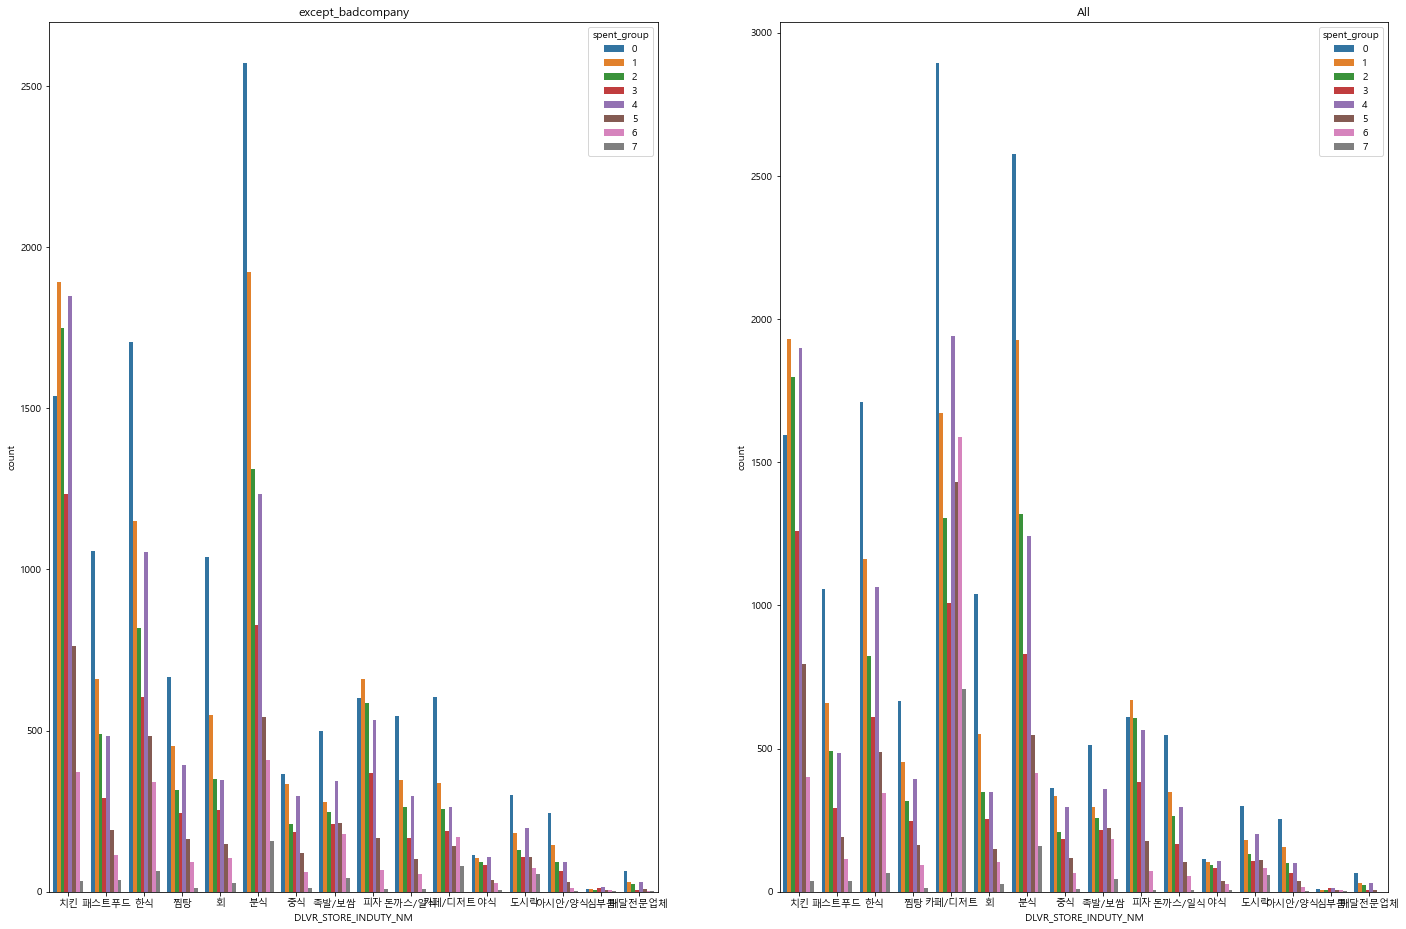

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(24,16))
sns.countplot(data=ndf, x='DLVR_STORE_INDUTY_NM', hue='spent_group', ax=ax1).set_title('except_badcompany')
sns.countplot(data=df, x='DLVR_STORE_INDUTY_NM', hue='spent_group', ax=ax2).set_title('All')

In [ ]:
cdf = pd.DataFrame(df.groupby('DLVR_STORE_INDUTY_NM')['spent_group'].value_counts())
cdf.rename(columns={'spent_group':'counts'}, inplace=True)
cdf.reset_index(level=[0,1], inplace=True)
cdf
# 'DLVR_STORE_INDUTY_NM'

,DLVR_STORE_INDUTY_NM,spent_group,counts
0,도시락,0,301
1,도시락,4,201
2,도시락,1,182
3,도시락,2,133
4,도시락,5,111
...,...,...,...
123,회,4,347
124,회,3,254
125,회,5,150
126,회,6,104


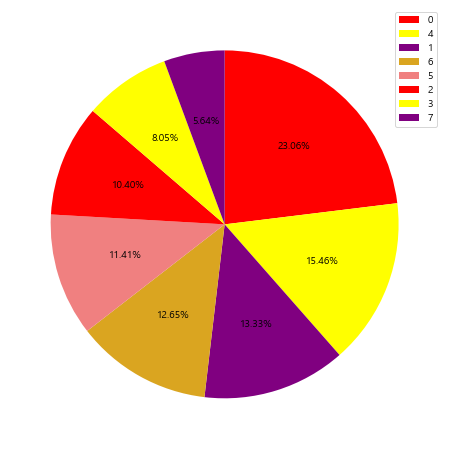

In [ ]:
## 데이터 준비
labels = cdf[cdf['DLVR_STORE_INDUTY_NM']=='카페/디저트']['spent_group']
frequency = cdf[cdf['DLVR_STORE_INDUTY_NM']=='카페/디저트']['counts']
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센트 출력
       colors = ['red','yellow','purple','goldenrod','lightcoral'] ## 색상 지정
       
       )
plt.legend(pie[0],labels) ## 범례 표시
plt.show()

카페의 경우 특이하게 0번 그룹, 20분 이내에 배달이 완료된 비중이 가장 높았다.
아마도 디저트와 음료의 특성상 제조에 오랜 시간이 걸리지 않기 때문인 것으로 보인다.

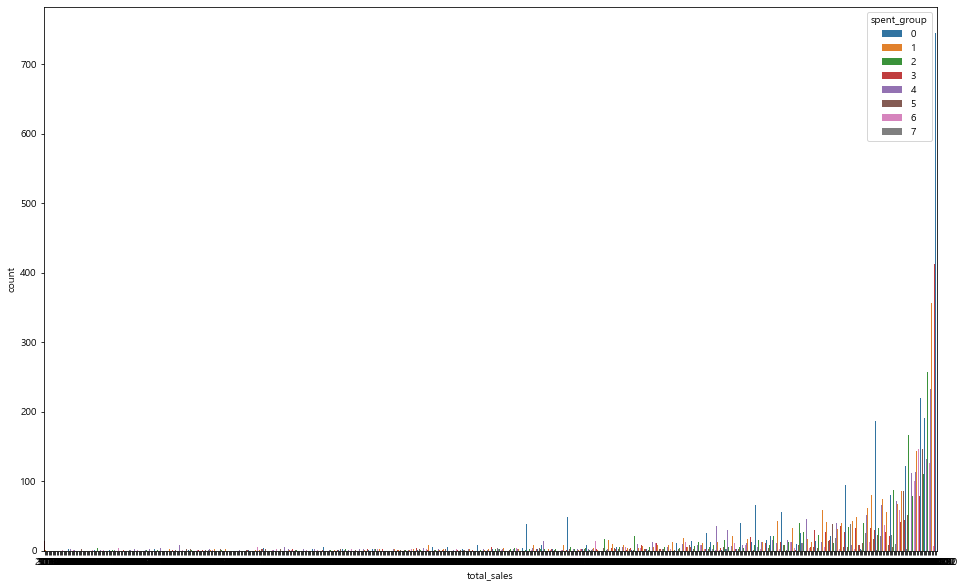

In [ ]:
plt.figure(figsize=(16,10))
sns.countplot(data=df, x='total_sales', hue='spent_group')

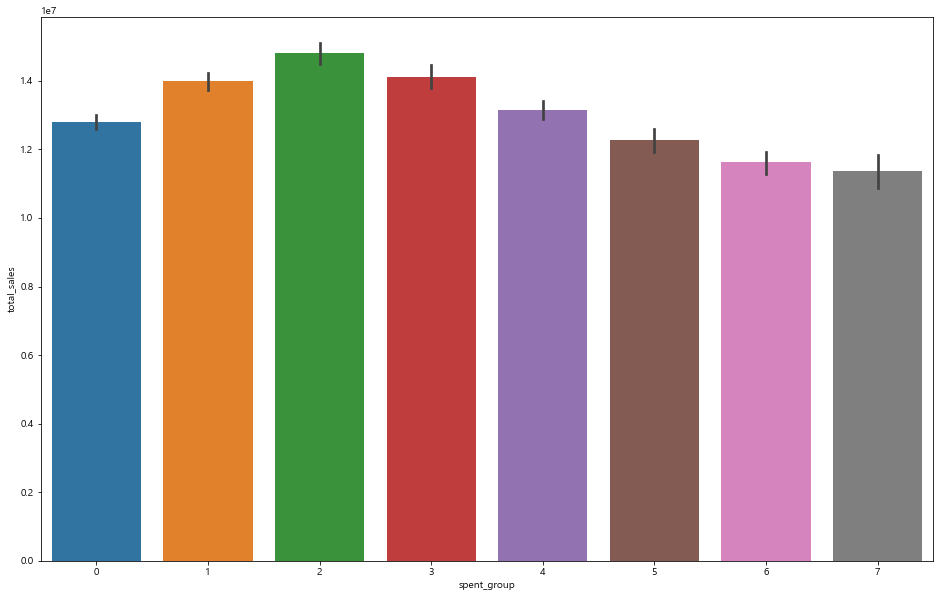

In [ ]:
plt.figure(figsize=(16,10))
sns.barplot(data=df, x='spent_group', y = 'total_sales' )

### 배달 소요시간 그룹별 매출액 시각화
gr1 = '00:16:48' - 0
gr2 = '00:21:00' - 1
gr3 = '00:24:04' - 2
gr4 = '00:27:00' - 3
gr5 = '00:33:29' - 4
gr6 = '00:40:00' - 5
gr7 = '00:53:44' - 6
gr7 = '00:53:44'이상 - 7



배달 소요시간이 적을 수록 매출이 더 많을 것이다 -> 거짓
배달 소요시간 그룹 2는 21분~24분04초 사이의 그룹
그룹2에서 가장 많은 매출액을 기록하고, 이후 소요시간이 늘어날 수록 점점 매출액이 줄어드는 모습을 볼 수 있다.


Text(0.5, 1.0, 'day')

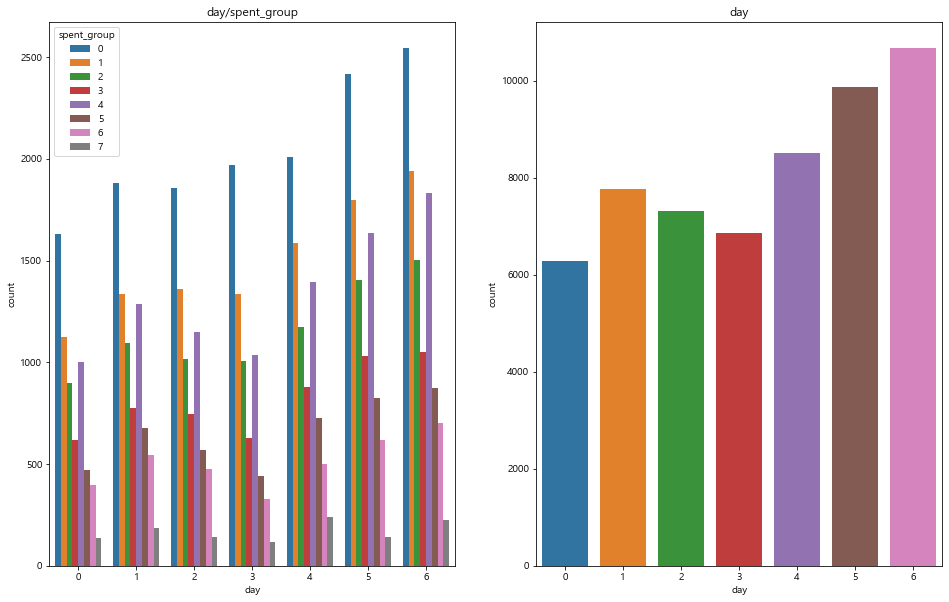

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(16,10))
sns.countplot(data=df, x='day', hue = 'spent_group', ax=ax1).set_title('day/spent_group')
sns.countplot(data=df, x='day', ax=ax2).set_title('day')

### 요일별, 소요시간별 주문건수의 경우, 요일별 주문 건수와 비례해 모든 소요시간별 그룹이 늘어나는 모습을 볼 수 있었느넫, 그 중에서도 그룹0과 그룹1, 그룹4의 증가가 돋보인다.


Text(0.5, 1.0, 'day/spent_group')

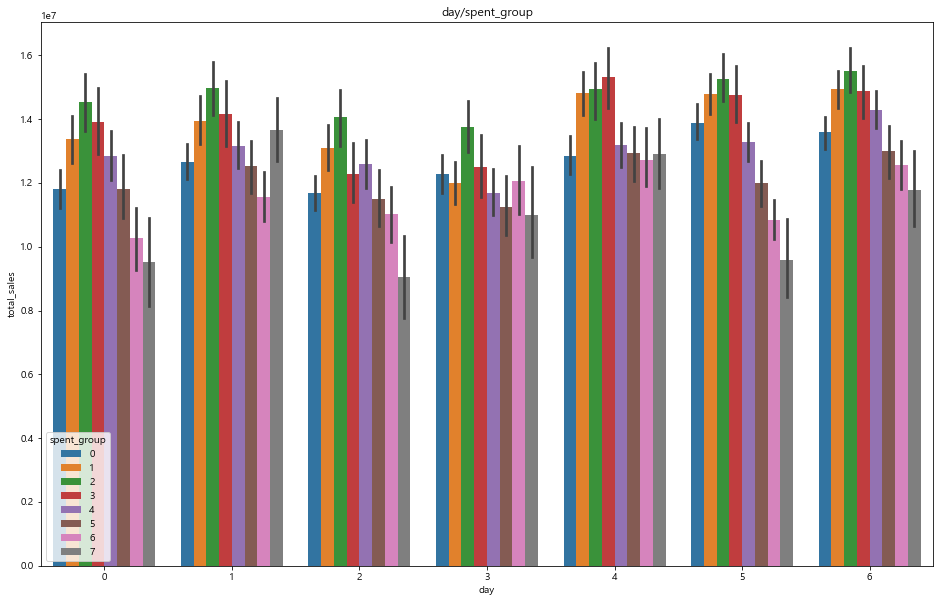

In [ ]:
plt.figure(figsize=(16,10))
sns.barplot(data=df, x='day', y='total_sales', hue='spent_group').set_title('day/spent_group')

### 요일별, 소요시간별 총 매출액 그래프 시각화
- 토요일 배달소요시간이 늦은 그룹7의 경우 매출액이 확연히 떨어지는 모습.


# 결론

배달업종의 총 매출액은 2019년과 비교해 2020년 크게 늘었다.
그리고 사회적 거리두기 캠페인을 시작한 3월부터 크게 배달업의 매출이 증가한 것을 보아, 정부의 코로나 대책에 따라서 매출이 큰 영향을 받았다.

그리고 총 매출액과 배달 소요시간은 어느정도 서로 상관 관계가 있다고 볼 수 있다.
특히 배달 소요시간이 33분을 넘어가게 되는 순간부터는, 배달 소요시간이 길어질 수록, 매출이 떨어지는 것을 볼 수 있었다.

### 매출액을 늘릴 수 있는 방안
1. 배달 소요시간이 33분을 넘지 않도록 할 것
2. 특히 주말 배달소요시간을 줄이도록 할 것
3. 정부의 코로나 대응 단계가 높을 수록 수요가 높아질 것을 대비   
를 통해서 매출액을 늘릴 수 있을 것이라고 예측